# ReneWind Project - Model Tuning

### Index

- <a href = #link0>Problem Statement</a>
- <a href = #link1>Explore the dataset, Data Preprocessing and extract insights using Exploratory Data Analysis</a>
- <a href = #link2>Model building</a>
    - <a href = #link20>Model building - Original data</a>
    - <a href = #link21>Model building - Oversampled data</a>
    - <a href = #link22>Model building - Undersampled data</a>
- <a href = #link3>Hyperparameter tuning (3 best performing models) </a>
    - <a href = #link30>Model 1 - Hyperparameter tuning </a>
    - <a href = #link31>Model 2 - Hyperparameter tuning </a>
    - <a href = #link32>Model 3 - Hyperparameter tuning </a>
- <a href = #link4>Model Performance Summary - Train, Validation and Test</a>
- <a href = #link5>Productionize the final model using Pipelines</a>
- <a href = #link6>Business Insights and Conclusions</a>

## <a name='link0'>**1. Problem Statement**</a>
#### Context:
Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.).
#### Objective
"ReneWind" is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 40000 observations in the training set and 10000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generator could be repaired before failing/breaking to reduce the maintenance cost. The different costs associated with maintenance are as follows:

- `Replacement cost = $40,000`
- `Repair cost = $15,000`
- `Inspection cost = $5,000`

“1” in the target variables should be considered as “failure” and “0” will represent “No failure”.
#### Data Description
- The data provided is a transformed version of original data which was collected using sensors.
- Train.csv - To be used for training and tuning of models. 
- Test.csv - To be used only for testing the performance of the final best model.
- Both the datasets consist of 40 predictor variables and 1 target variable

### Importing the required libraries

In [1]:
# Ignore warnings
import warnings as wns
wns.filterwarnings('ignore')

In [2]:
# import the important packages
# library used for data manipulation and analysis
import pandas as pd 
# library used for working with arrays.
import numpy as np 
# library for plots and visualisations
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [3]:
# Removing the limit of number of columns and rows printed
pd.set_option('display.max_columns',None) # Display all columns
pd.set_option('display.max_rows',200)# Display 200 rows.

## <a name='link1'>**2. Explore the Dataset, Data Preprocessing and extract insights using Exploratory Data Analysis.**</a>

### Load the input file and understand the structure of the data

In [4]:
#Parser engine to use. The C engine is faster while the python engine is currently more feature-complete.
url_Train = "ReneWind_Train.csv"
url_Test = "ReneWind_Test.csv"
ReneWind_Train_df = pd.read_csv(url_Train, engine="python")
ReneWind_Test_df = pd.read_csv(url_Test, engine="python")

In [5]:
# Get the shape of the data.
print(f'The ReneWind Train dataframe has {ReneWind_Train_df.shape[0]} rows and {ReneWind_Train_df.shape[1]} columns.')
print(f'The ReneWind Test dataframe has {ReneWind_Test_df.shape[0]} rows and {ReneWind_Test_df.shape[1]} columns.')

The ReneWind Train dataframe has 40000 rows and 41 columns.
The ReneWind Test dataframe has 10000 rows and 41 columns.


In [6]:
# Get a sample 10 rows of data using random state = 1 
ReneWind_Train_df.sample(n=10, random_state=1)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
3841,-1.761261,1.725575,3.115833,-0.722076,1.636716,-0.665690,-1.947430,0.340637,-0.434492,-1.861200,-0.748612,1.483686,3.233458,-1.749122,-5.027887,-1.380684,-1.399922,2.132650,-1.505987,-2.451394,-4.512434,0.036412,0.488204,2.010276,-2.194374,5.600887,-4.419503,-3.459057,1.848695,3.183373,3.131519,4.559034,5.339557,-4.860047,3.971955,1.084243,-0.286629,-2.123846,0.088027,0.467075,0
12898,-0.319513,-3.223125,6.945362,-6.073991,0.560963,-1.151006,-1.368454,-0.203942,-3.529692,5.112241,-3.728806,2.433346,3.220423,1.316607,-1.652448,-0.902062,-6.406294,2.609491,-0.583582,-3.180174,-3.682714,-0.107914,-3.111936,1.132707,1.378427,2.399556,5.679397,-3.810228,-4.106580,-3.610371,9.925717,2.086696,0.300373,-0.581224,2.849599,11.783096,-1.036491,-2.656733,4.048503,-0.043561,0
15032,3.660333,-0.500171,1.673259,-0.759881,-3.446873,-0.177149,-0.150797,-0.962328,0.798321,-0.378106,2.456049,1.879260,2.194074,-1.375423,-1.303997,-3.645691,-1.916947,-0.564766,3.382290,-0.034927,-5.565015,2.032844,-0.867979,-1.966172,0.320279,-0.502116,2.028311,-0.768731,1.730565,3.023456,-2.705545,-3.397233,0.711632,0.350068,5.073397,-2.271627,-0.376924,-0.115856,-0.630295,-1.382311,0
36781,-2.031378,-7.075963,1.609581,-2.808285,-2.626699,-3.161704,-2.401735,2.357427,-1.254624,2.679572,-4.866034,5.473158,5.339906,2.596990,-5.179196,-2.976010,-0.568500,3.978816,1.724852,6.053674,-5.327246,3.560616,3.365471,-0.391724,1.284162,-5.200010,2.720958,-0.473470,-4.738653,0.069819,-1.207865,0.449110,-5.094617,2.979341,2.545381,7.661457,2.721677,-5.888977,3.233609,-2.895987,0
9201,-1.167479,4.636223,-1.011644,0.316850,3.275565,-0.310062,1.388811,4.651706,-4.848882,-2.074384,3.231886,5.032511,-2.634830,-2.825284,1.290487,6.432091,0.251476,-1.082105,0.626093,-7.337963,0.912257,-0.578727,5.034060,8.326799,-4.863529,5.333237,-8.192814,-1.593566,5.291905,6.553607,5.233752,10.877396,8.250367,-5.159849,4.674169,-3.516928,-1.730339,1.969370,-3.425079,2.554127,0
21288,-3.187048,3.810940,0.850021,1.188452,3.331867,-1.399935,-1.550283,0.635168,-0.389022,-2.848663,-3.003486,3.366907,2.550711,-2.365782,-6.294215,-2.694268,1.701079,3.318560,-0.941472,-2.522348,-4.691335,1.915986,4.572873,6.014727,-3.252703,6.471669,-7.581418,-2.034078,-0.284077,2.482489,0.878916,7.499800,3.778780,-5.057147,2.754992,-0.312605,0.304002,0.109490,-0.080787,-0.263837,0
37321,5.669580,1.844251,7.218002,1.555360,-3.158366,-2.388045,-0.937380,-2.299472,3.368328,-0.475084,-1.593526,-0.763408,4.474542,-1.536328,-2.689027,-7.051011,-1.965468,-2.414158,3.769097,0.893762,-9.227253,1.080952,-4.955377,-3.369827,2.379708,4.442623,3.109184,-2.405830,-1.814943,-1.632428,0.736474,-4.127790,-1.698119,-0.144663,6.158802,-0.501844,-2.075539,-3.096800,0.029782,-2.895171,0
8600,-2.459670,-2.393870,3.225757,0.063384,-0.580143,-2.797114,-0.634555,2.118902,-2.976534,2.924087,-3.354634,4.535033,0.790923,0.388404,-0.780539,0.137287,-0.147010,0.193798,4.075666,1.939926,-1.893998,0.262768,-0.026678,3.035784,0.127010,-0.972351,0.181684,0.249843,-2.562915,-0.478893,2.429896,2.392210,-2.040141,3.390597,2.891005,5.108812,0.085175,-1.349147,2.056523,-2.479685,0
33089,1.001489,0.983718,-2.561203,3.374567,2.495414,-0.720727,0.067609,3.662200,0.327424,-1.763364,-3.399646,-4.088555,-5.765949,1.293401,4.038515,3.405233,6.860836,-0.479386,-3.237459,2.401008,4.419077,-0.393963,2.743099,4.115304,1.274670,-1.566217,-4.673000,2.077497,-0.692994,-1.068473,2.815314,5.783949,-1.469405,-2.904733,-2.098224,-2.400717,-0.437158,-3.385150,-3.896752,3.312009,1
39511,-3.648807,-1.589335,-0.575212,0.649347,1.329551,-2.730112,-2.246243,2.806568,-0.600226,-1.071473,-5.598787,4.039250,2.624120,0.526896,-5.738545,-2.256579,3.684117,4.407944,-0.596813,3.524609,-3.745387,3.215177,6.282294,4.594613,-1.079856,-0.412728,-5.065619,-0.157468,-3.058230,1.398945,-1.026855,6.162144,-1.610211,-1.636248,1.450378,2.

#### Observations:
* The ReneWind Train DataFrame has 40000 records with 41 columns (40 predictors and 1 target) as mentioned in the Data Dictionary. 
* Data in each row corresponds to the ciphered version of data collected data of generator of wind turbines using sensors for both failure and no-failure cases.

In [7]:
# Get a sample 10 rows of data using random state = 1 
ReneWind_Test_df.sample(n=10, random_state=1)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
9953,-3.642989,-2.991712,1.150946,-0.806135,0.328630,-1.070489,-2.416586,-0.082621,-1.535028,2.165466,-3.325114,2.231100,2.304830,0.507254,-4.910741,-3.057718,-0.956120,3.780014,1.085163,1.110837,-3.642370,2.035220,1.869286,3.832390,-1.149583,-0.659048,-1.271155,-0.415975,-2.406156,1.270125,0.641649,4.688979,0.982275,0.040755,2.943188,4.380255,0.529428,-0.962180,2.070362,-2.670986,0
3850,0.421011,7.070890,1.442649,4.005238,3.435008,0.715639,0.467850,-4.659354,2.328795,-1.791828,-4.665389,-3.141963,-4.886134,-3.432306,0.880865,-6.650568,5.383603,1.140604,0.477172,-1.946021,-0.578651,0.521954,-2.491632,4.928981,1.112024,5.423309,-3.249506,2.132426,-2.726772,-5.214189,-0.878888,-1.582873,-1.555831,-1.378471,-2.575136,-2.639971,-1.064622,6.831357,-0.131100,0.821739,0
4962,-2.406380,-4.326474,5.862436,3.628815,-3.775036,-3.400774,-4.506914,0.515315,1.205491,0.587753,-2.647829,0.296137,4.770212,-0.333058,-6.789652,-5.280182,-0.035949,0.228028,5.226134,7.268387,-8.345363,0.347146,-3.398053,-0.753402,-0.143169,-1.031087,-2.848705,-0.969582,0.794340,5.043893,-1.674667,1.455191,1.660643,1.876941,9.015424,0.938796,-0.214319,-6.697331,0.681943,-5.726251,0
3886,-2.847344,3.643339,-0.441596,-0.559618,3.250652,0.169008,-0.711523,-0.094238,-0.464217,-2.816563,-0.543566,2.714986,2.173515,-2.122112,-4.791874,-1.014492,0.157711,3.056802,-2.402591,-3.910385,-2.328887,1.024393,3.824321,3.702592,-3.243110,5.779647,-5.686675,-2.200866,1.092539,2.318576,0.499532,4.947610,4.377171,-4.926749,0.594905,-0.528709,0.620539,1.460508,0.162583,1.068971,0
5437,-6.524196,-2.019911,2.395184,3.198928,1.876401,-2.525521,-3.236752,-1.724779,-0.620883,3.242813,-9.341908,0.858261,0.173555,0.318598,-5.544565,-6.901967,3.351034,4.621733,3.070714,4.460784,-3.418208,2.167192,0.544294,7.328260,0.037286,-0.379031,-3.039907,2.230097,-7.042203,-3.213072,-0.405946,5.124316,-3.135353,2.830705,0.936231,5.962508,0.578153,0.900611,3.643508,-5.039374,0
8517,-4.565615,4.759230,3.297812,1.566290,3.719033,-0.204733,-2.727202,-2.388198,1.034768,-2.741076,-1.214231,-0.194103,4.791451,-2.968038,-8.618074,-3.700228,-2.031678,2.538988,-1.948438,-4.324579,-5.362695,-0.587085,-0.070988,3.374796,-4.268812,10.240406,-7.388539,-4.023563,1.447288,2.813899,2.222333,6.811678,8.010252,-6.164095,3.392020,-0.400538,-1.035694,0.506000,0.916235,-1.588589,0
2041,0.745117,2.474443,7.635350,3.728164,0.033327,-3.688863,-1.478883,-1.264305,1.527332,0.621482,-6.466876,-0.098775,1.900968,-1.416878,-2.682180,-6.062271,1.425344,-1.104239,3.917674,2.005121,-6.511076,0.077342,-4.217935,1.951218,1.863927,5.320663,-0.680242,-0.895969,-4.561699,-4.103072,3.091792,0.428245,-2.913473,0.910645,3.996204,2.693537,-1.783425,-2.048068,1.342986,-3.303458,0
1989,-4.673774,3.492129,-0.395250,0.518262,3.888836,1.741348,-0.906453,-1.556054,-2.303986,-0.217361,1.687948,0.265513,-0.673553,-2.534453,-3.247734,0.349706,-2.246325,1.897735,-0.567784,-6.748903,-0.098009,-0.786407,1.103992,6.792874,-4.932534,6.023666,-6.309607,-1.393455,2.969644,4.025780,2.747318,8.476590,9.224126,-4.242431,2.474566,-1.344336,-1.706285,5.020358,-0.104404,-0.573049,0
1933,-5.490688,-0.637703,-0.277166,-1.236653,1.856082,3.751732,-3.236830,-6.799139,1.315258,0.698252,-0.128798,-3.996453,1.032270,-1.393905,-6.302001,-6.683800,-2.597582,5.969400,-2.539711,-1.826103,-1.584092,0.280498,-2.831331,1.083399,-2.104652,1.659366,-1.575929,-0.473415,0.993737,1.436040,-2.681268,-0.300305,6.059186,-2.201972,-0.737952,1.334445,0.539884,5.061453,2.926501,-1.443989,0
9984,-1.206023,3.927584,0.212296,-1.189733,1.246608,-0.086468,0.157855,-1.317988,0.970073,-3.747191,-0.223439,4.735067,3.458651,-2.898275,-4.600937,-3.469764,0.758669,2.729611,-0.832914,-2.054779,-3.830509,1.748132,2.644547,-0.219000,-1.646234,4.779772,-2.934936,-1.749340,0.700535,0.856176,-3.601396,-2.509357,0.501016,-2.355198,-0.705423,-0.902603,2.

#### Observations:
* The ReneWind Test DataFrame has 10000 records with 41 columns (40 predictors and 1 target) as mentioned in the Data Dictionary. 
* Data in each row corresponds to the ciphered version of data collected data of generator of wind turbines using sensors for both failure and no-failure cases.

In [8]:
# use info() method to print a concise summary of the pandas DataFrame
ReneWind_Train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      39954 non-null  float64
 1   V2      39961 non-null  float64
 2   V3      40000 non-null  float64
 3   V4      40000 non-null  float64
 4   V5      40000 non-null  float64
 5   V6      40000 non-null  float64
 6   V7      40000 non-null  float64
 7   V8      40000 non-null  float64
 8   V9      40000 non-null  float64
 9   V10     40000 non-null  float64
 10  V11     40000 non-null  float64
 11  V12     40000 non-null  float64
 12  V13     40000 non-null  float64
 13  V14     40000 non-null  float64
 14  V15     40000 non-null  float64
 15  V16     40000 non-null  float64
 16  V17     40000 non-null  float64
 17  V18     40000 non-null  float64
 18  V19     40000 non-null  float64
 19  V20     40000 non-null  float64
 20  V21     40000 non-null  float64
 21  V22     40000 non-null  float64
 22

#### Observations:
* The ReneWind Train DataFrame has 41 columns - 40 float and 1 integer.
* We can also notice that two of the columns have missing values.

In [9]:
# use info() method to print a concise summary of the pandas DataFrame
ReneWind_Test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      9989 non-null   float64
 1   V2      9993 non-null   float64
 2   V3      10000 non-null  float64
 3   V4      10000 non-null  float64
 4   V5      10000 non-null  float64
 5   V6      10000 non-null  float64
 6   V7      10000 non-null  float64
 7   V8      10000 non-null  float64
 8   V9      10000 non-null  float64
 9   V10     10000 non-null  float64
 10  V11     10000 non-null  float64
 11  V12     10000 non-null  float64
 12  V13     10000 non-null  float64
 13  V14     10000 non-null  float64
 14  V15     10000 non-null  float64
 15  V16     10000 non-null  float64
 16  V17     10000 non-null  float64
 17  V18     10000 non-null  float64
 18  V19     10000 non-null  float64
 19  V20     10000 non-null  float64
 20  V21     10000 non-null  float64
 21  V22     10000 non-null  float64
 22 

#### Observations:
* The ReneWind Test DataFrame has 41 columns - 40 float and 1 integer.
* We can also notice that two of the columns have missing values.

### Summary of the dataset

In [10]:
# using the describe() menthod to get the 5 point summary of the numerical columns in the dataframe.
# .T will transponse the table into a readable format with dataframe columns arranged in rows.
ReneWind_Train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,39954.0,-0.288120,3.449072,-13.501880,-2.751460,-0.773518,1.836708,17.436981
V2,39961.0,0.442672,3.139431,-13.212051,-1.638355,0.463939,2.537508,13.089269
V3,40000.0,2.505514,3.406263,-11.469369,0.202682,2.265319,4.584920,18.366477
V4,40000.0,-0.066078,3.437330,-16.015417,-2.349574,-0.123691,2.148596,13.279712
V5,40000.0,-0.044574,2.107183,-8.612973,-1.507206,-0.096824,1.346224,9.403469
V6,40000.0,-1.000849,2.036756,-10.227147,-2.363446,-1.006635,0.373909,7.065470
V7,40000.0,-0.892793,1.756510,-8.205806,-2.036913,-0.934738,0.206820,8.006091
V8,40000.0,-0.563123,3.298916,-15.657561,-2.660415,-0.384188,1.714383,11.679495
V9,40000.0,-0.007739,2.161833,-8.596313,-1.493676,-0.052085,1.425713,8.507138
V10,40000.0,-0.001848,2.183034,-11.000790,-1.390549,0.105779,1.486105,8.108472


#### Observations:
This is the 5 point summary of 41 numerical columns.
* For the 40 columns, it does not make sense to describe ciphered data.
    * the mean and the median of these 40 columns is around zero.
    * The minimum values are negative, as low as -23.
    * The maximum values are positive, as high as +24.
    * The column V32 has the highest standard deviation of 5.
* The 'Target' columns has two values - 0 and 1 (No-failure and failure).

In [11]:
# get a copy of the test and train data for backup.
RW_Train_data = ReneWind_Train_df.copy()
RW_Test_data = ReneWind_Test_df.copy()

### Data Preprocessing

#### Finding Missing Values
Let's start with finding the missing values.

In [12]:
# checking for missing value
ReneWind_Train_df.isnull().sum()

V1        46
V2        39
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
V29        0
V30        0
V31        0
V32        0
V33        0
V34        0
V35        0
V36        0
V37        0
V38        0
V39        0
V40        0
Target     0
dtype: int64

#### Observations:
* There are 46 missing values in column V1 and 39 missing values in column V2.
* These missing values should be imputed before model building.

## Exploratory Data Analysis (EDA)
### Univariate Analysis
#### Plotting histograms and boxplots for all the variables

In [13]:
# function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram
# for feature in RW_Train_data.columns:
#     print("# Display a histogram_boxplot for the category column '{0}'".format(feature))
#     print("histogram_boxplot(RW_Train_data, '{0}', figsize=(12, 7), kde=False, bins=None)".format(feature))
#     print("-" * 40)

In [14]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=60, fontsize=12)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.2f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot
# for col in category_cols:
#     print("# Display a labeled_barplot for the category column '{0}'".format(col))
#     print("labeled_barplot(Visa_Data,'{0}',kde=True)".format(col))
#     print("-" * 40)

#### Starting with the dependent variable booking status

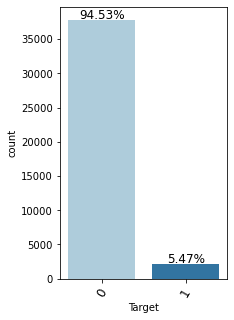

In [15]:
# Display a labeled_barplot for the category column 'case_status'
labeled_barplot(RW_Train_data,'Target',perc=True)

#### Observations:
* The field target has two unique values - '0' and '1'.
* There are 94.53% of observations with target = '0' and 5.47% of observations with target = '1'.
* The class weights need to addressed when creating the models.

#### Plotting all the independent features

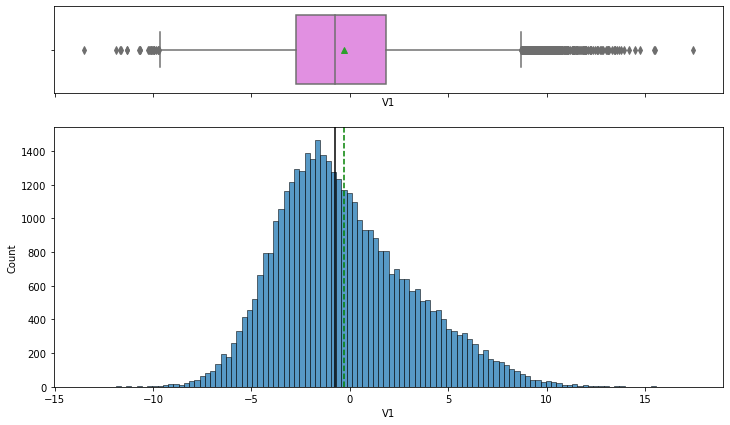

In [16]:
# Display a histogram_boxplot for the column 'V1'
histogram_boxplot(RW_Train_data, 'V1', figsize=(12, 7), kde=False, bins=None)

#### Observations:
* The distribution for this column follow normal distribution.
* The mean and median is slightly less than zero.
* The mean is greater than median and the graph is skewed to the right.

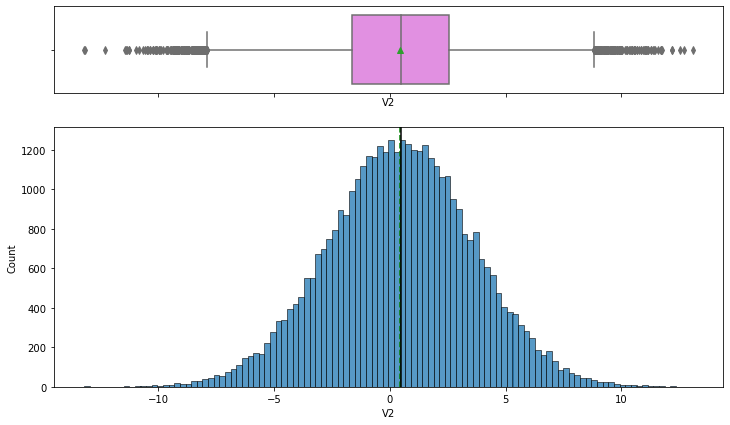

In [17]:
# Display a histogram_boxplot for the column 'V2'
histogram_boxplot(RW_Train_data, 'V2', figsize=(12, 7), kde=False, bins=None)

#### Observations:
* The distribution for this column follow normal distribution.
* The mean and median is slightly greater than zero.
* The mean is equal to median and the graph is symmetrical.

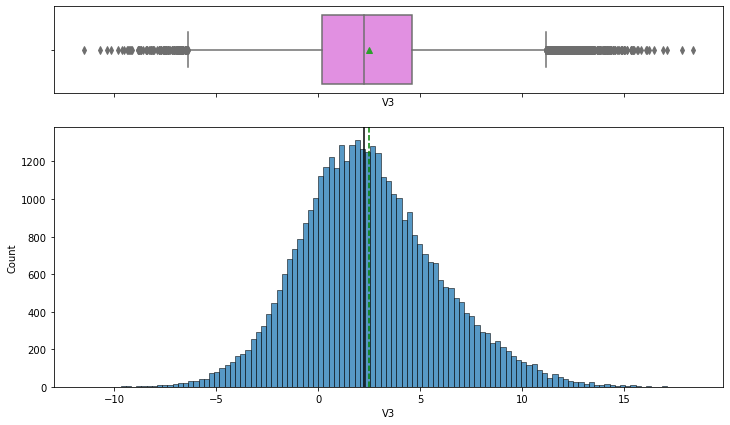

In [18]:
# Display a histogram_boxplot for the column 'V3'
histogram_boxplot(RW_Train_data, 'V3', figsize=(12, 7), kde=False, bins=None)

#### Observations:
* The distribution for this column follow normal distribution.
* The mean and median is greater than zero.
* The mean is greater than median and the graph is slightly skewed to the right.

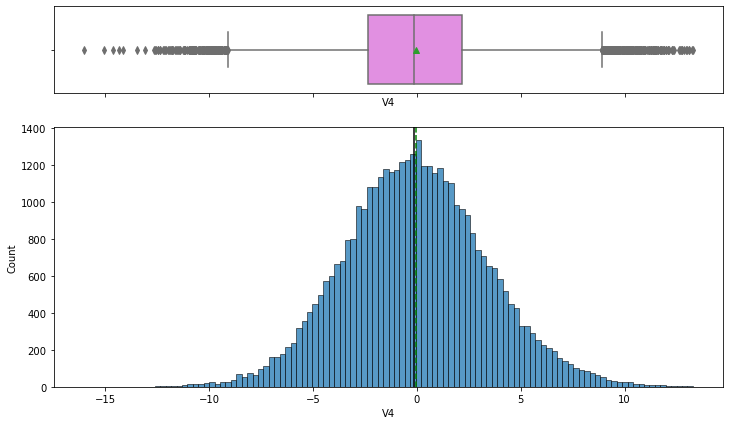

In [19]:
# Display a histogram_boxplot for the category column 'V4'
histogram_boxplot(RW_Train_data, 'V4', figsize=(12, 7), kde=False, bins=None)

#### Observations:
* The distribution for this column follow normal distribution.
* The mean and median is equal to zero.
* The mean is equal to median and the graph is symmetrical.

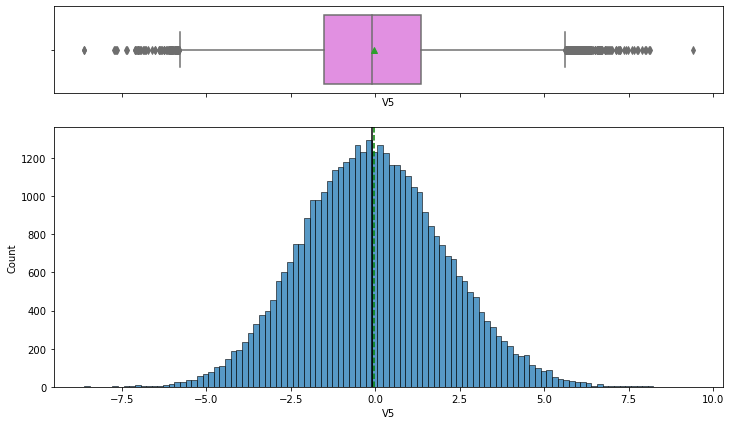

In [20]:
# Display a histogram_boxplot for the category column 'V5'
histogram_boxplot(RW_Train_data, 'V5', figsize=(12, 7), kde=False, bins=None)

#### Observations:
* The distribution for this column follow normal distribution.
* The mean and median is equal to zero.
* The mean is equal to median and the graph is symmetrical.

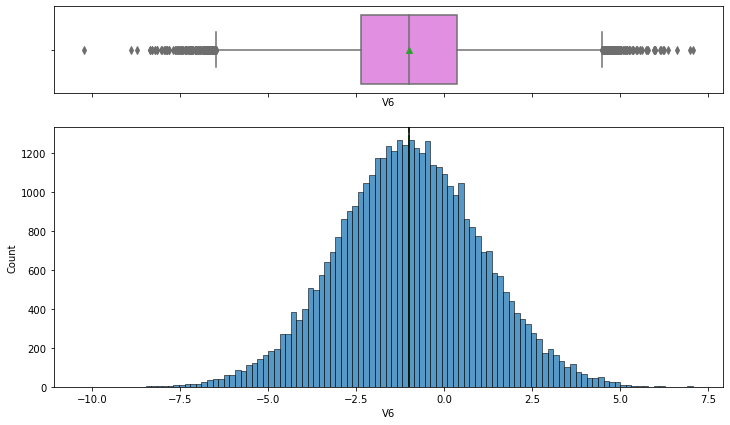

In [21]:
# Display a histogram_boxplot for the category column 'V6'
histogram_boxplot(RW_Train_data, 'V6', figsize=(12, 7), kde=False, bins=None)

#### Observations:
* The distribution for this column follow normal distribution.
* The mean and median is slightly less than zero.
* The mean is equal to median and the graph is symmetrical.

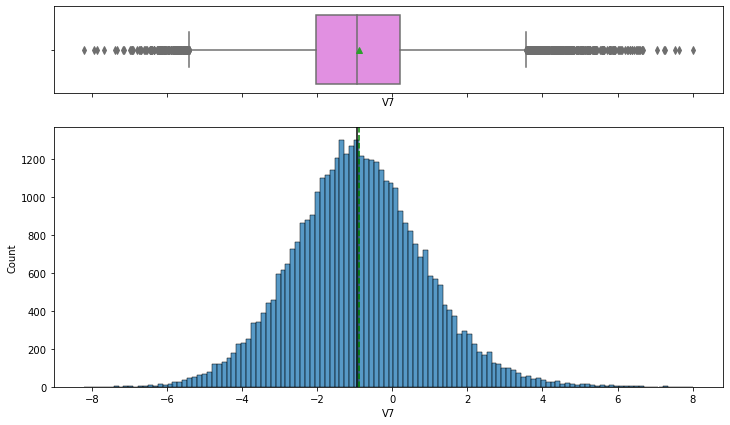

In [22]:
# Display a histogram_boxplot for the category column 'V7'
histogram_boxplot(RW_Train_data, 'V7', figsize=(12, 7), kde=False, bins=None)

#### Observations:
* The distribution for this column follow normal distribution.
* The mean and median is less than zero.
* The mean is equal to median and the graph is symmetrical.

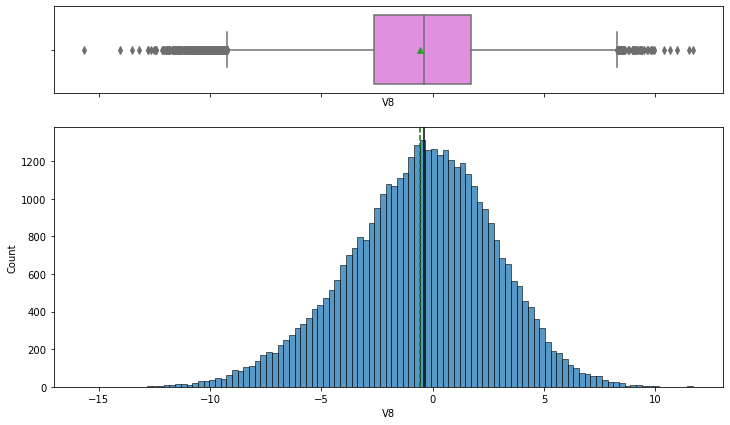

In [23]:
# Display a histogram_boxplot for the category column 'V8'
histogram_boxplot(RW_Train_data, 'V8', figsize=(12, 7), kde=False, bins=None)

#### Observations:
* The distribution for this column follow normal distribution.
* The mean and median is less than zero.
* The mean is less than median and the graph is slightly skewed to the left.

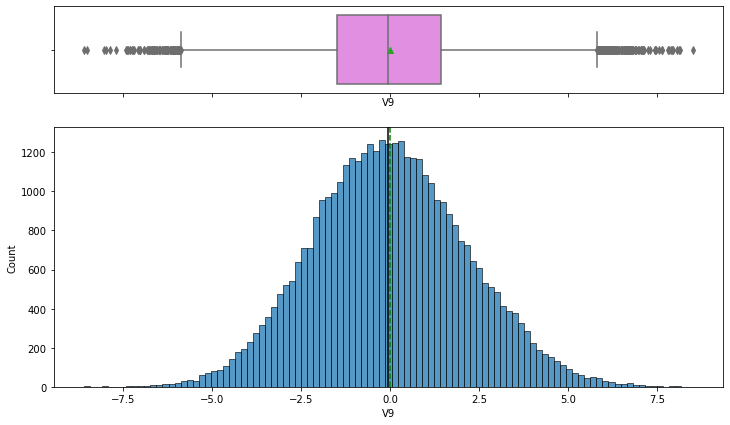

In [24]:
# Display a histogram_boxplot for the category column 'V9'
histogram_boxplot(RW_Train_data, 'V9', figsize=(12, 7), kde=False, bins=None)

#### Observations:
* The distribution for this column follow normal distribution.
* The mean and median is equal to zero.
* The mean is equal to median and the graph is symmetrical.

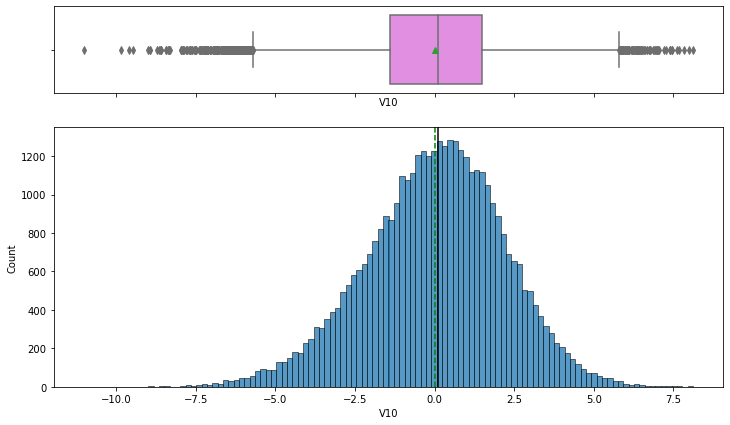

In [25]:
# Display a histogram_boxplot for the category column 'V10'
histogram_boxplot(RW_Train_data, 'V10', figsize=(12, 7), kde=False, bins=None)

#### Observations:
* The distribution for this column follow normal distribution.
* The mean and median is almost zero.
* The mean is less than median and the graph is slightly skewed to the left.

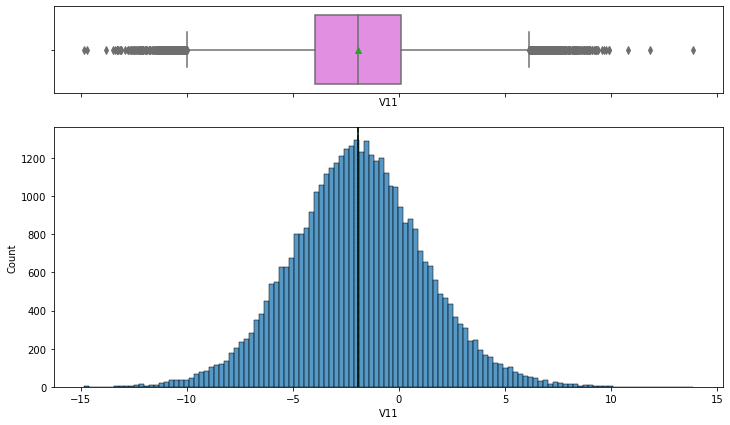

In [26]:
# Display a histogram_boxplot for the category column 'V11'
histogram_boxplot(RW_Train_data, 'V11', figsize=(12, 7), kde=False, bins=None)

#### Observations:
* The distribution for this column follow normal distribution.
* The mean and median is less than to zero.
* The mean is equal to median and the graph is symmetrical.

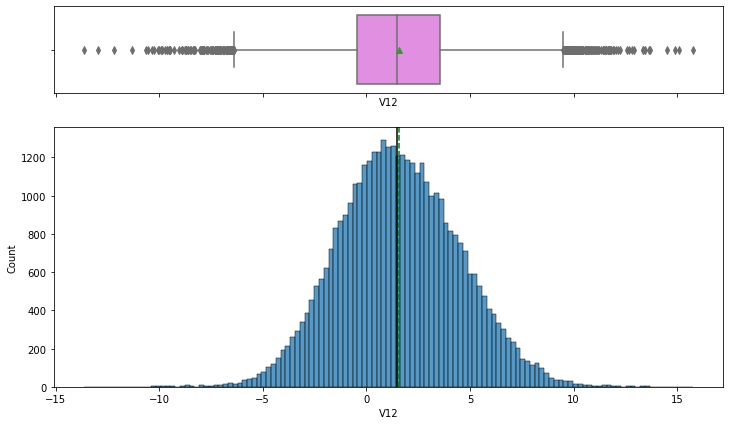

In [27]:
# Display a histogram_boxplot for the category column 'V12'
histogram_boxplot(RW_Train_data, 'V12', figsize=(12, 7), kde=False, bins=None)

#### Observations:
* The distribution for this column follow normal distribution.
* The mean and median is greater than zero.
* The mean is equal to median and the graph is symmetrical.

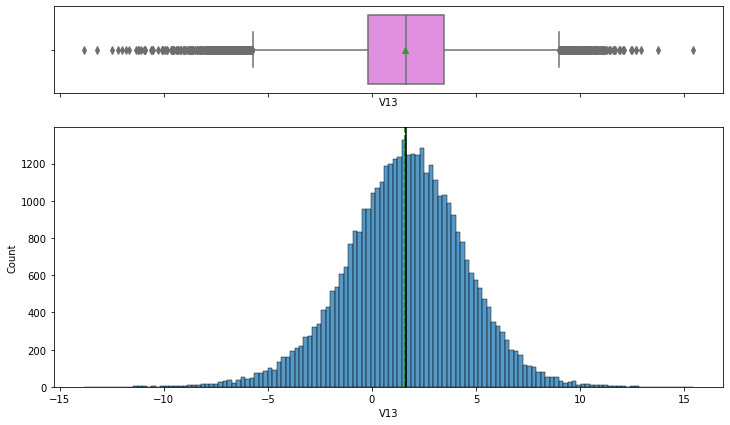

In [28]:
# Display a histogram_boxplot for the category column 'V13'
histogram_boxplot(RW_Train_data, 'V13', figsize=(12, 7), kde=False, bins=None)

#### Observations:
* The distribution for this column follow normal distribution.
* The mean and median is greater than zero.
* The mean is equal to median and the graph is symmetrical.

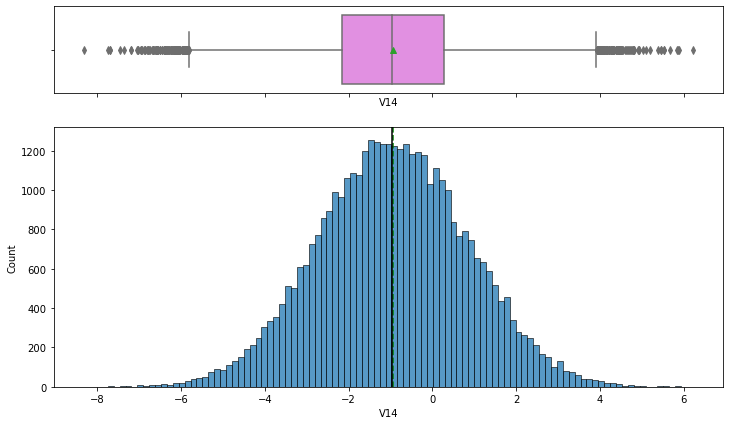

In [29]:
# Display a histogram_boxplot for the category column 'V14'
histogram_boxplot(RW_Train_data, 'V14', figsize=(12, 7), kde=False, bins=None)

#### Observations:
* The distribution for this column follow normal distribution.
* The mean and median is less than zero.
* The mean is equal to median and the graph is symmetrical.

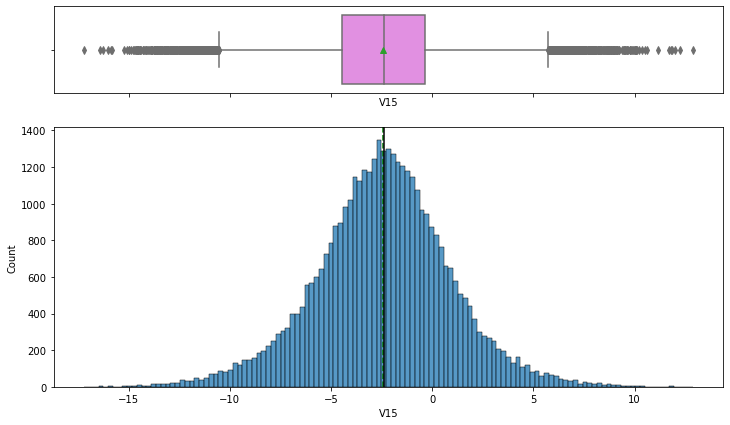

In [30]:
# Display a histogram_boxplot for the category column 'V15'
histogram_boxplot(RW_Train_data, 'V15', figsize=(12, 7), kde=False, bins=None)

#### Observations:
* The distribution for this column follow normal distribution.
* The mean and median is less than zero.
* The mean is equal to median and the graph is symmetrical.

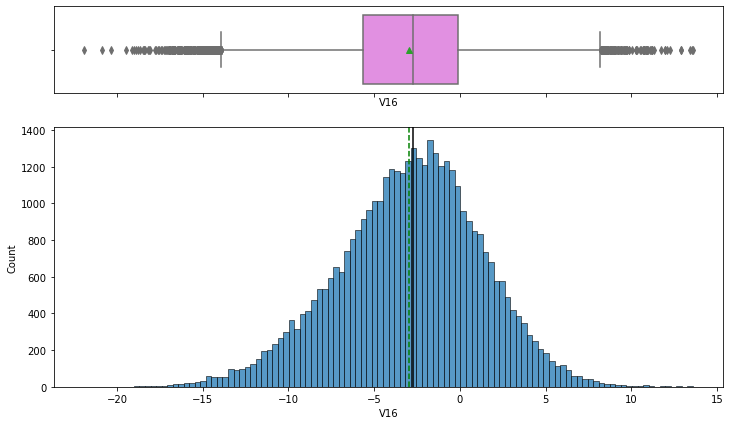

In [31]:
# Display a histogram_boxplot for the category column 'V16'
histogram_boxplot(RW_Train_data, 'V16', figsize=(12, 7), kde=False, bins=None)

#### Observations:
* The distribution for this column follow normal distribution.
* The mean and median is less than zero.
* The mean is less than median and the graph slighty skewed to the left.

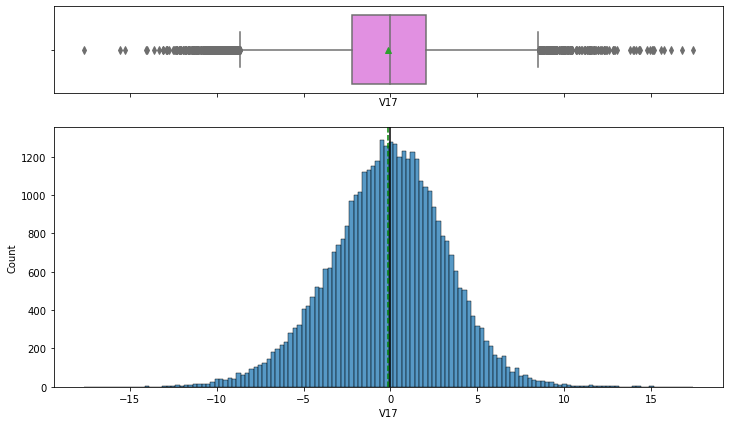

In [32]:
# Display a histogram_boxplot for the category column 'V17'
histogram_boxplot(RW_Train_data, 'V17', figsize=(12, 7), kde=False, bins=None)

#### Observations:
* The distribution for this column follow normal distribution.
* The mean and median is almost zero.
* The mean is equal to median and the graph is symmetrical.

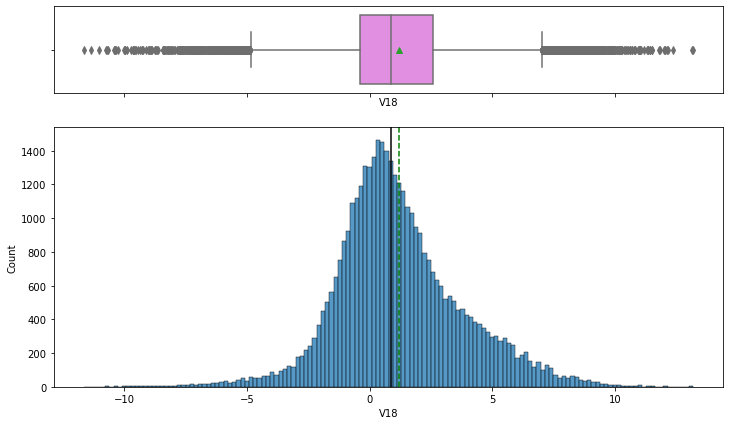

In [33]:
# Display a histogram_boxplot for the category column 'V18'
histogram_boxplot(RW_Train_data, 'V18', figsize=(12, 7), kde=False, bins=None)

#### Observations:
* The distribution for this column follow normal distribution.
* The mean and median is greater than zero.
* The mean is greater than median and the graph is slightly skewed to the right.

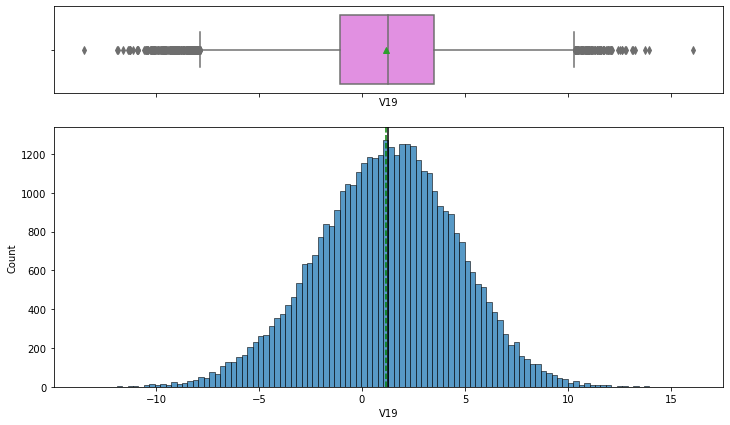

In [34]:
# Display a histogram_boxplot for the category column 'V19'
histogram_boxplot(RW_Train_data, 'V19', figsize=(12, 7), kde=False, bins=None)

#### Observations:
* The distribution for this column follow normal distribution.
* The mean and median is greater than zero.
* The mean is equal to median and the graph is symmetrical.

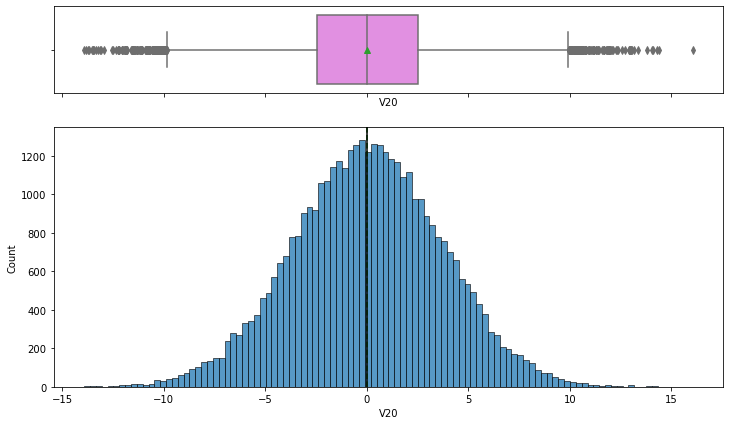

In [35]:
# Display a histogram_boxplot for the category column 'V20'
histogram_boxplot(RW_Train_data, 'V20', figsize=(12, 7), kde=False, bins=None)

#### Observations:
* The distribution for this column follow normal distribution.
* The mean and median is almost zero.
* The mean is equal to median and the graph is symmetrical.

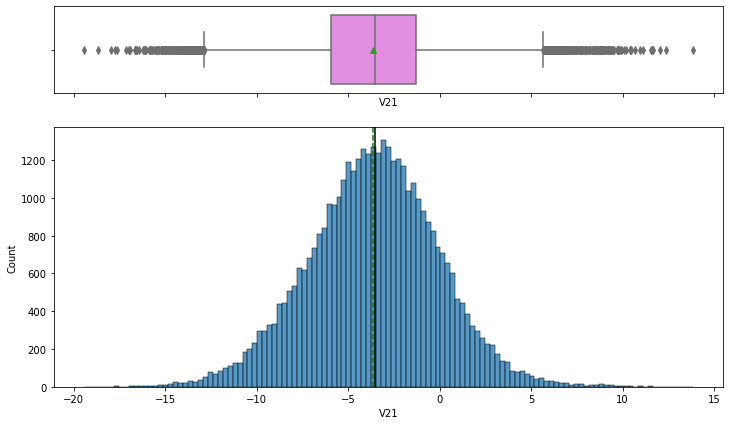

In [36]:
# Display a histogram_boxplot for the category column 'V21'
histogram_boxplot(RW_Train_data, 'V21', figsize=(12, 7), kde=False, bins=None)

#### Observations:
* The distribution for this column follow normal distribution.
* The mean and median is less than zero.
* The mean is equal to median and the graph is symmetrical.

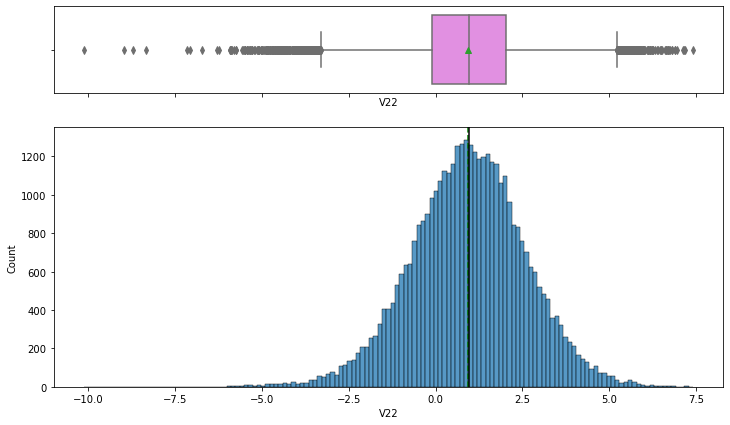

In [37]:
# Display a histogram_boxplot for the category column 'V22'
histogram_boxplot(RW_Train_data, 'V22', figsize=(12, 7), kde=False, bins=None)

#### Observations:
* The distribution for this column follow normal distribution.
* The mean and median is greater than zero.
* The mean is equal to median and the graph is symmetrical.

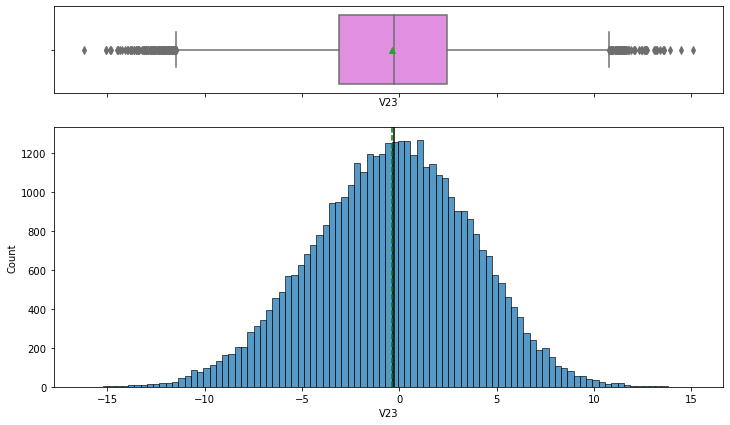

In [38]:
# Display a histogram_boxplot for the category column 'V23'
histogram_boxplot(RW_Train_data, 'V23', figsize=(12, 7), kde=False, bins=None)

#### Observations:
* The distribution for this column follow normal distribution.
* The mean and median is less than zero.
* The mean is equal to median and the graph is symmetrical.

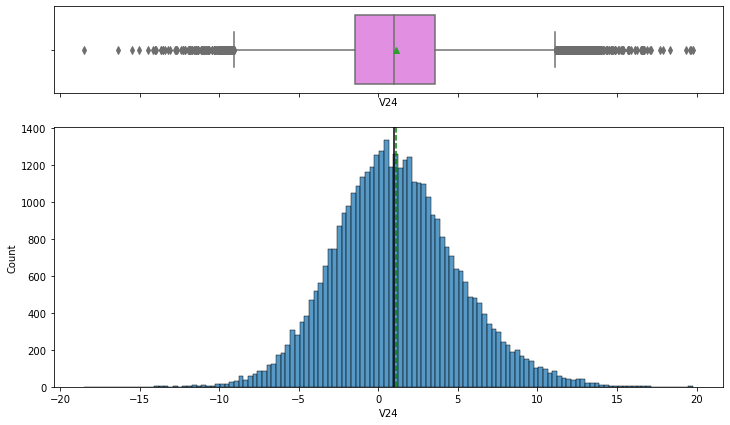

In [39]:
# Display a histogram_boxplot for the category column 'V24'
histogram_boxplot(RW_Train_data, 'V24', figsize=(12, 7), kde=False, bins=None)

#### Observations:
* The distribution for this column follow normal distribution.
* The mean and median is greater than zero.
* The mean is equal to median and the graph is symmetrical.

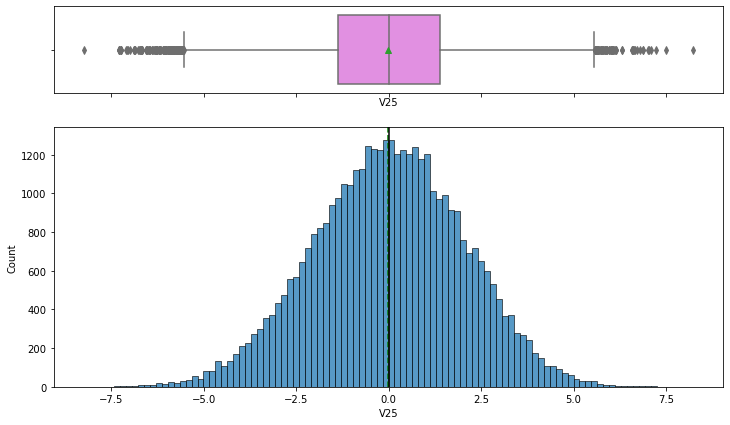

In [40]:
# Display a histogram_boxplot for the category column 'V25'
histogram_boxplot(RW_Train_data, 'V25', figsize=(12, 7), kde=False, bins=None)

#### Observations:
* The distribution for this column follow normal distribution.
* The mean and median is almost zero.
* The mean is equal to median and the graph is symmetrical.

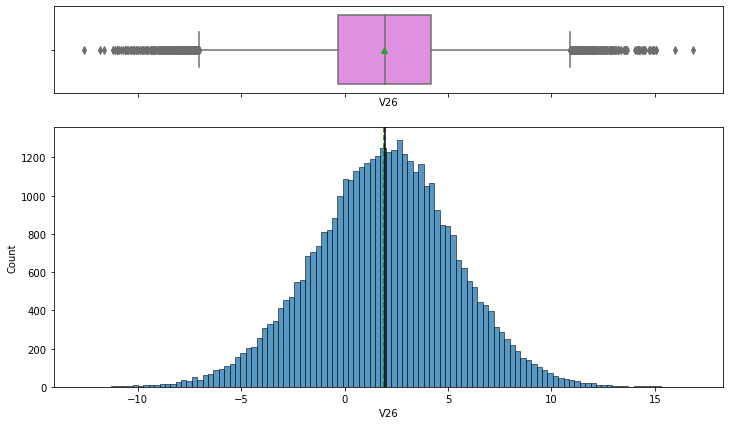

In [41]:
# Display a histogram_boxplot for the category column 'V26'
histogram_boxplot(RW_Train_data, 'V26', figsize=(12, 7), kde=False, bins=None)

#### Observations:
* The distribution for this column follow normal distribution.
* The mean and median is greater than zero.
* The mean is equal to median and the graph is symmetrical.

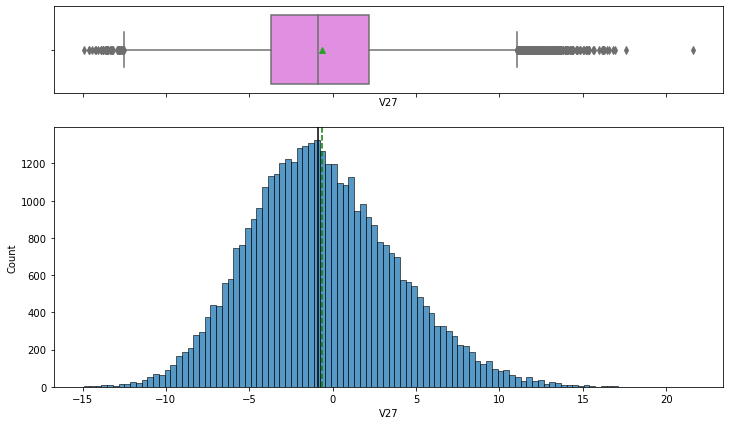

In [42]:
# Display a histogram_boxplot for the category column 'V27'
histogram_boxplot(RW_Train_data, 'V27', figsize=(12, 7), kde=False, bins=None)

#### Observations:
* The distribution for this column follow normal distribution.
* The mean and median is less than zero.
* The mean is greater than median and the graph is slightly skewed to the right.

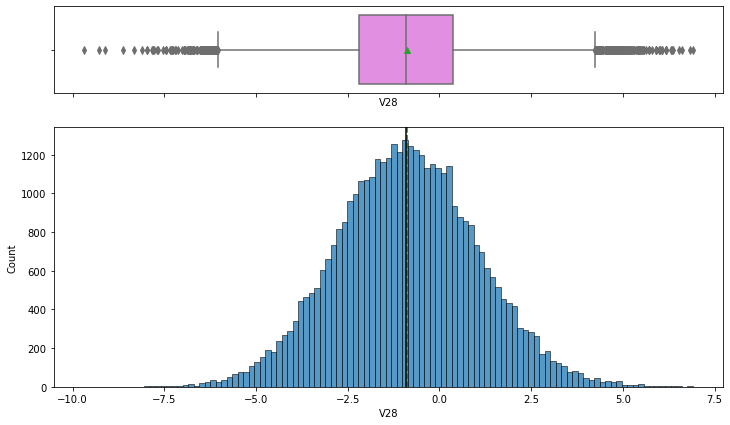

In [43]:
# Display a histogram_boxplot for the category column 'V28'
histogram_boxplot(RW_Train_data, 'V28', figsize=(12, 7), kde=False, bins=None)

#### Observations:
* The distribution for this column follow normal distribution.
* The mean and median is greater than zero.
* The mean is equal to median and the graph is symmetrical.

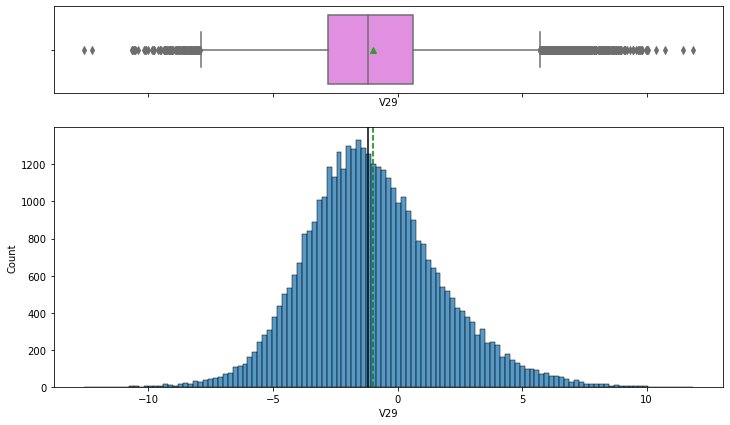

In [44]:
# Display a histogram_boxplot for the category column 'V29'
histogram_boxplot(RW_Train_data, 'V29', figsize=(12, 7), kde=False, bins=None)

#### Observations:
* The distribution for this column follow normal distribution.
* The mean and median is less than zero.
* The mean is greater than median and the graph is slightly skewed to the right.

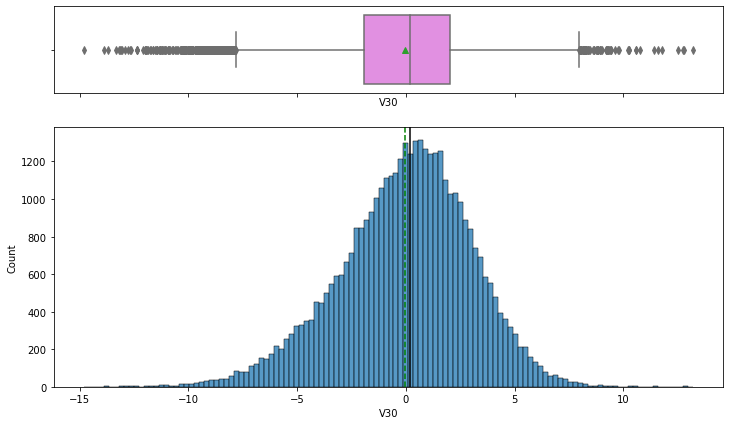

In [45]:
# Display a histogram_boxplot for the category column 'V30'
histogram_boxplot(RW_Train_data, 'V30', figsize=(12, 7), kde=False, bins=None)

#### Observations:
* The distribution for this column follow normal distribution.
* The mean and median is almost zero.
* The mean is less than median and the graph is slightly skewed to the left.

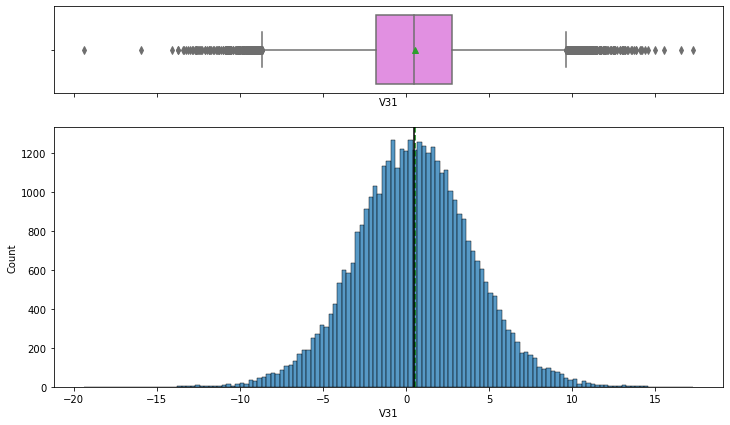

In [46]:
# Display a histogram_boxplot for the category column 'V31'
histogram_boxplot(RW_Train_data, 'V31', figsize=(12, 7), kde=False, bins=None)

#### Observations:
* The distribution for this column follow normal distribution.
* The mean and median is greater than zero.
* The mean is equal to median and the graph is symmetrical.

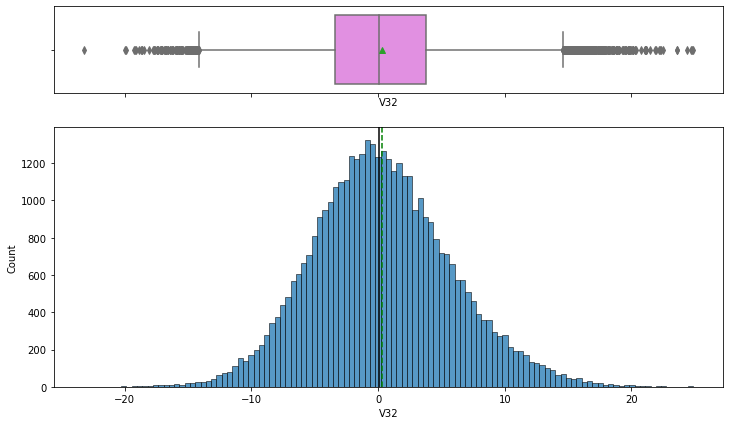

In [47]:
# Display a histogram_boxplot for the category column 'V32'
histogram_boxplot(RW_Train_data, 'V32', figsize=(12, 7), kde=False, bins=None)

#### Observations:
* The distribution for this column follow normal distribution.
* The mean and median is almost zero.
* The mean is almost equal to median and the graph is symmetrical.

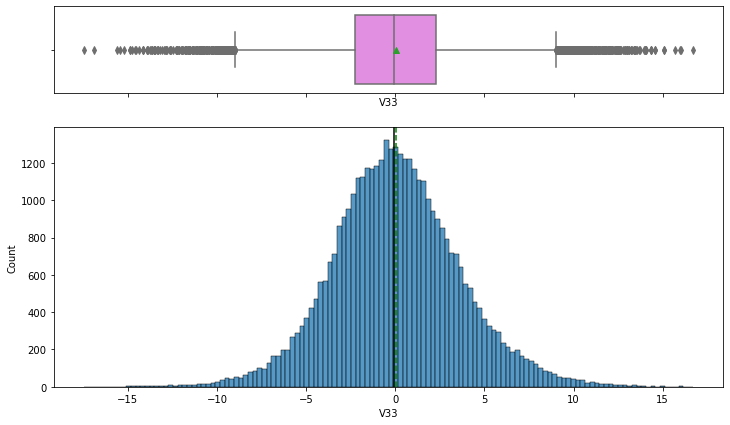

In [48]:
# Display a histogram_boxplot for the category column 'V33'
histogram_boxplot(RW_Train_data, 'V33', figsize=(12, 7), kde=False, bins=None)

#### Observations:
* The distribution for this column follow normal distribution.
* The mean and median is almost zero.
* The mean is equal to median and the graph is symmetrical.

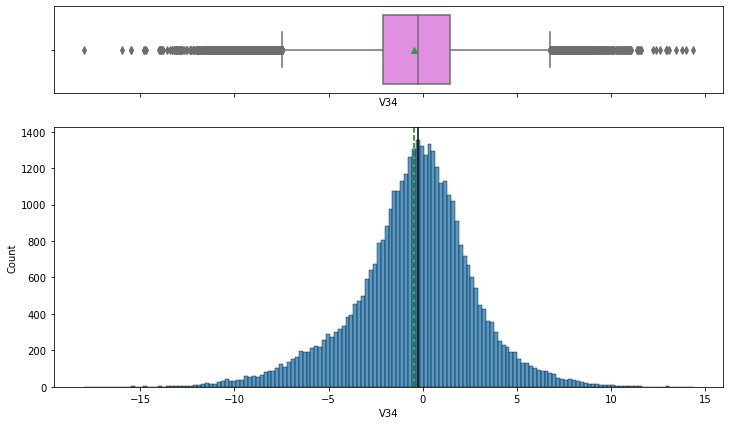

In [49]:
# Display a histogram_boxplot for the category column 'V34'
histogram_boxplot(RW_Train_data, 'V34', figsize=(12, 7), kde=False, bins=None)

#### Observations:
* The distribution for this column follow normal distribution.
* The mean and median is less than zero.
* The mean is less than median and the graph slightly skewed to the left.

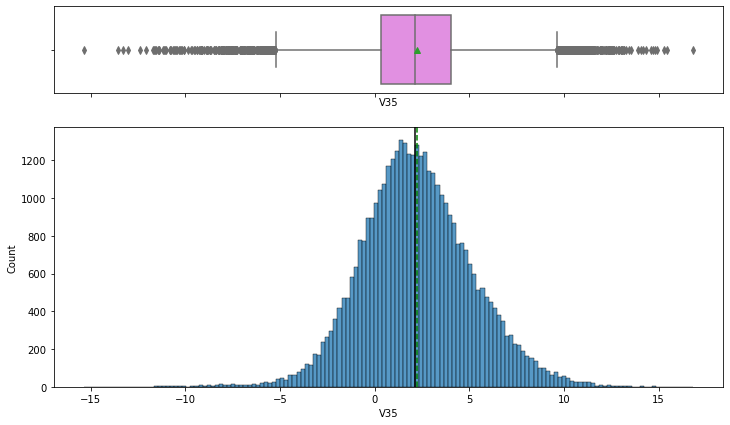

In [50]:
# Display a histogram_boxplot for the category column 'V35'
histogram_boxplot(RW_Train_data, 'V35', figsize=(12, 7), kde=False, bins=None)

#### Observations:
* The distribution for this column follow normal distribution.
* The mean and median is almost zero.
* The mean is equal to median and the graph is symmetrical.

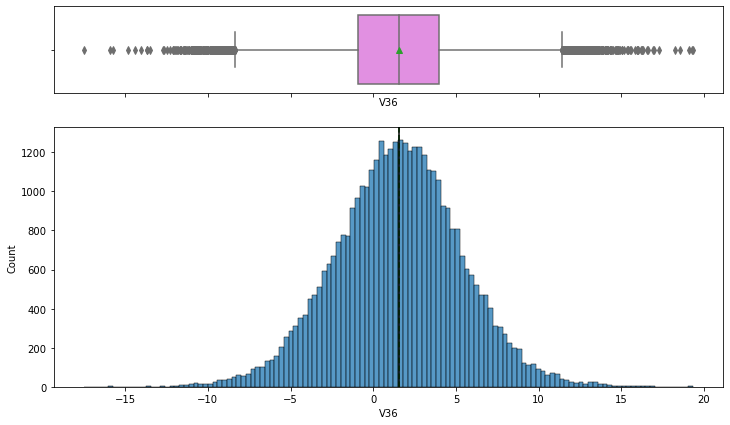

In [51]:
# Display a histogram_boxplot for the column 'V36'
histogram_boxplot(RW_Train_data, 'V36', figsize=(12, 7), kde=False, bins=None)

#### Observations:
* The distribution for this column follow normal distribution.
* The mean and median is greater than zero.
* The mean is equal to median and the graph is symmetrical.

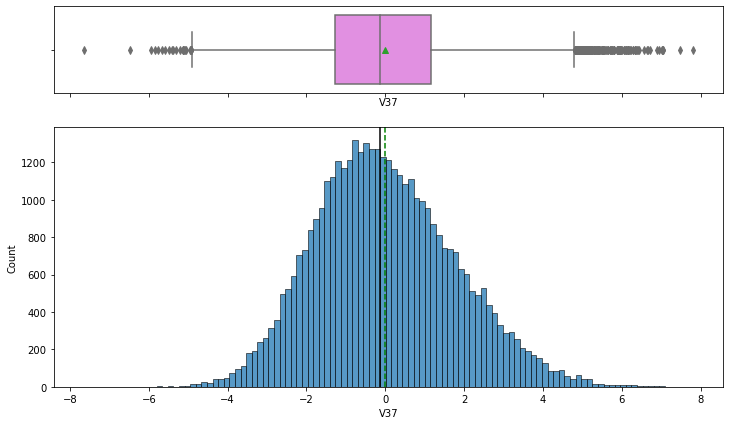

In [52]:
# Display a histogram_boxplot for the column 'V37'
histogram_boxplot(RW_Train_data, 'V37', figsize=(12, 7), kde=False, bins=None)

#### Observations:
* The distribution for this column follow normal distribution.
* The mean and median is less than zero.
* The mean is greater than median and the graph is slightly skewed to the right.

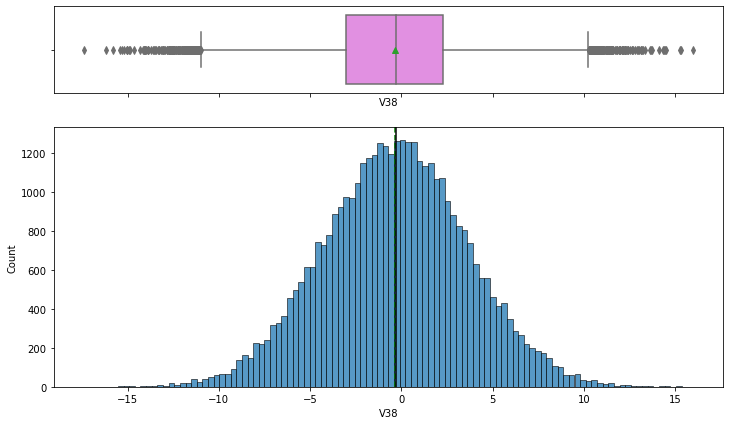

In [53]:
# Display a histogram_boxplot for the column 'V38'
histogram_boxplot(RW_Train_data, 'V38', figsize=(12, 7), kde=False, bins=None)

#### Observations:
* The distribution for this column follow normal distribution.
* The mean and median is less than zero.
* The mean is equal to median and the graph is symmetrical.

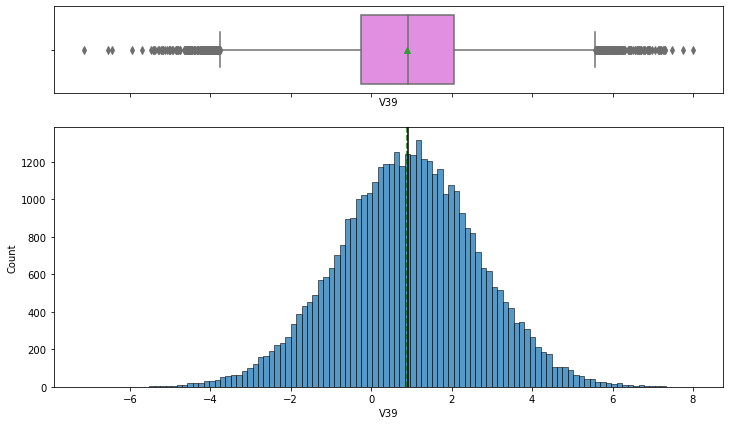

In [54]:
# Display a histogram_boxplot for the column 'V39'
histogram_boxplot(RW_Train_data, 'V39', figsize=(12, 7), kde=False, bins=None)

#### Observations:
* The distribution for this column follow normal distribution.
* The mean and median is greater than zero.
* The mean is equal to median and the graph is symmetrical.

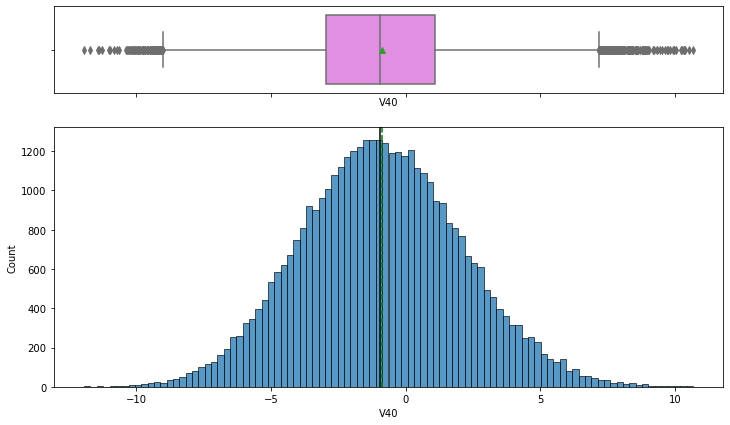

In [55]:
# Display a histogram_boxplot for the column 'V40'
histogram_boxplot(RW_Train_data, 'V40', figsize=(12, 7), kde=False, bins=None)

#### Observations:
* The distribution for this column follow normal distribution.
* The mean and median is less than zero.
* The mean is almost equal to median and the graph is symmetrical.

### Bivariate and Multivariate Analysis
#### Bivariate and Multivariate Analysis are not part of this project as the data is ciphered, But I am interested in looking at the correlation and heat map for the numerical fields.

In [56]:
# Print the correlation between numerical columns.
RW_Train_data.corr().round(2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
V1,1.00,0.31,0.39,-0.30,-0.52,0.17,0.48,-0.36,0.40,-0.02,0.29,-0.14,0.06,-0.27,0.41,-0.34,-0.36,-0.39,0.13,-0.34,-0.39,0.21,-0.44,-0.52,0.68,0.22,0.69,-0.29,-0.07,-0.47,0.09,-0.64,-0.30,-0.02,0.14,-0.12,-0.35,0.14,-0.11,0.21,0.07
V2,0.31,1.00,0.09,0.29,0.38,0.24,0.45,-0.39,0.28,-0.48,0.16,-0.17,-0.39,-0.85,0.22,-0.25,0.16,-0.30,0.12,-0.59,-0.06,-0.09,-0.18,0.22,-0.13,0.79,-0.20,0.04,0.18,-0.22,-0.05,-0.12,0.20,-0.28,-0.06,-0.58,-0.44,0.66,-0.35,0.15,0.00
V3,0.39,0.09,1.00,-0.04,-0.36,-0.29,-0.15,-0.41,0.23,0.45,-0.34,-0.17,0.33,-0.22,-0.06,-0.53,-0.42,-0.27,0.40,-0.04,-0.66,-0.20,-0.79,-0.27,0.60,0.46,0.51,-0.42,-0.45,-0.61,0.47,-0.37,-0.23,0.23,0.50,0.45,-0.50,-0.08,0.54,-0.30,-0.22
V4,-0.30,0.29,-0.04,1.00,0.08,-0.46,-0.20,0.03,0.27,-0.11,-0.36,-0.23,-0.28,-0.23,-0.15,-0.20,0.61,-0.41,0.60,0.42,-0.08,-0.03,0.04,0.51,-0.27,0.10,-0.59,0.67,-0.18,0.13,-0.38,0.38,-0.05,0.30,0.34,-0.56,-0.35,0.10,-0.39,-0.67,0.12
V5,-0.52,0.38,-0.36,0.08,1.00,0.16,-0.08,0.17,-0.30,-0.34,-0.21,-0.02,-0.34,-0.15,-0.15,0.27,0.33,0.44,-0.51,-0.36,0.38,-0.09,0.46,0.67,-0.60,0.40,-0.66,-0.03,0.09,0.14,0.30,0.62,0.46,-0.61,-0.34,-0.04,0.07,0.17,-0.22,0.34,-0.10
V6,0.17,0.24,-0.29,-0.46,0.16,1.00,0.22,-0.56,0.08,-0.11,0.71,-0.40,-0.24,-0.35,0.15,-0.08,-0.45,0.28,-0.41,-0.70,0.23,-0.07,-0.18,-0.19,-0.19,0.15,0.21,-0.18,0.58,0.15,-0.11,-0.29,0.59,-0.40,-0.32,-0.25,-0.07,0.63,-0.03,0.42,-0.01
V7,0.48,0.45,-0.15,-0.20,-0.08,0.22,1.00,0.09,-0.24,-0.17,0.53,0.39,-0.49,-0.32,0.87,0.40,0.02,-0.56,0.14,-0.41,0.47,-0.28,-0.05,-0.21,0.20,0.02,0.29,0.19,0.31,-0.25,-0.03,-0.46,-0.27,0.23,-0.44,-0.28,-0.01,0.47,-0.24,0.48,0.24
V8,-0.36,-0.39,-0.41,0.03,0.17,-0.56,0.09,1.00,-0.61,-0.18,-0.19,0.68,-0.10,0.55,0.17,0.80,0.51,-0.02,-0.15,0.44,0.48,-0.04,0.72,0.25,-0.21,-0.51,-0.42,0.17,0.06,0.37,0.14,0.48,-0.24,0.05,-0.16,0.15,0.53,-0.62,-0.35,0.26,0.14
V9,0.40,0.28,0.23,0.27,-0.30,0.08,-0.24,-0.61,1.00,-0.29,-0.09,-0.63,0.39,-0.24,-0.39,-0.75,-0.04,-0.05,0.05,0.13,-0.60,0.32,-0.34,-0.39,0.32,0.31,0.18,-0.09,-0.24,-0.29,-0.46,-0.37,-0.15,-0.09,0.11,-0.35,-0.20,0.04,0.00,-0.31,0.01
V10,-0.02,-0.48,0.45,-0.11,-0.34,-0.11,-0.17,-0.18,-0.29,1.00,-0.15,-0.12,0.07,0.34,0.09,-0.12,-0.52,-0.15,0.41,0.05,-0.12,-0.19,-0.47,-0.01,0.28,-0.21,0.51,0.02,-0.43,-0.32,0.41,-0.03,-0.11,0.51,0.34,0.56,-0.41,-0.01,0.57,-0.47,-0.06


#### Observations:
* That is a lot of numbers to look through, Let's put them in a heat map.

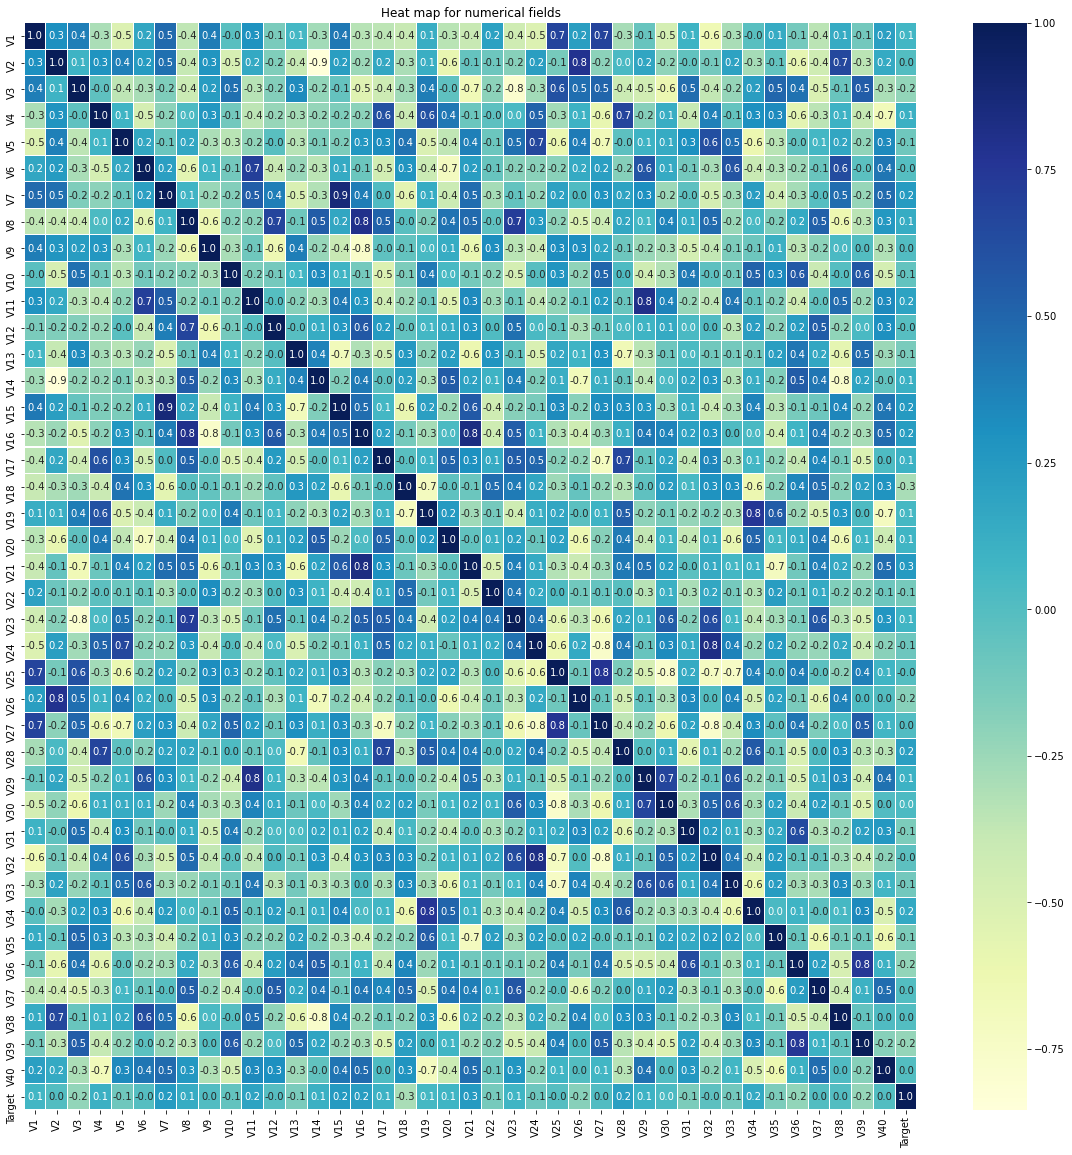

In [57]:
# Set the figure size and title for the plot
plt.figure(figsize=(20,20))
plt.title('Heat map for numerical fields')

# Display a heat map to find the relationship between numerical fields.
sns.heatmap(RW_Train_data.corr(),annot=True,linewidths=0.01,fmt=".1f",cmap="YlGnBu")
plt.show()

#### Observations (as per the heatmap):
* There seems to be very low correlation between the independent fields and the target field. The 'Target' field is correlated with V18 (-0.3) and V21 (+0.3).
* Exploring the correlation between predictor fields:
    * Fields V15 and V7 has a correlation of 0.9
    * There are many pairs with a correlation of 0.8. Example (V36,V39), (V19,V34), (V24,V32) etc.

## Data Preprocessing (continued...)

### Feature engineering
* As the data is ciphered, the scope of feature engineering is limited.

### Column Encoding
* There are no category columns in this dataset that need to be encoded.

### Outlier detection and treatment
* For now, I have decided not to do outlier treatment as the models are capable of handling outliers.

### Preparing data for modeling
#### Splitting up Data for Model Prediction

In [58]:
# defining X and y variables
X = RW_Train_data.drop(['Target'],axis=1)
y = RW_Train_data['Target']

In [59]:
# Library to split data
from sklearn.model_selection import train_test_split

# splitting the data in 75:25 ratio for train to validation data
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.25, random_state=1, stratify=y
)

# Get a copy of X_train and y_train for doing the pipelines later.
X_train_copy = X_train.copy()
y_train_copy = y_train.copy()

In [60]:
# defining X and y variables
X_test = RW_Test_data.drop(['Target'],axis=1)
y_test = RW_Test_data['Target']

In [61]:
# printing the row split across Training, Validation and Testing
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_val.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 30000
Number of rows in validation data = 10000
Number of rows in test data = 10000


In [62]:
print("Original Train Failed Cases     : {0} ({1:0.2f}%)".format(len(RW_Train_data.loc[RW_Train_data['Target'] == 1]), (len(RW_Train_data.loc[RW_Train_data['Target'] == 1])/len(RW_Train_data.index)) * 100))
print("Original Train Successful Cases : {0} ({1:0.2f}%)".format(len(RW_Train_data.loc[RW_Train_data['Target'] == 0]), (len(RW_Train_data.loc[RW_Train_data['Target'] == 0])/len(RW_Train_data.index)) * 100))
print("")
print("New Training Failed Cases       : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("New Training Successful Cases   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Validation Failed Cases         : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Validation Successful Cases     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")
print("Original Test Failed Cases      : {0} ({1:0.2f}%)".format(len(RW_Test_data.loc[RW_Test_data['Target'] == 1]), (len(RW_Test_data.loc[RW_Test_data['Target'] == 1])/len(RW_Test_data.index)) * 100))
print("Original Test Successful Cases  : {0} ({1:0.2f}%)".format(len(RW_Test_data.loc[RW_Test_data['Target'] == 0]), (len(RW_Test_data.loc[RW_Test_data['Target'] == 0])/len(RW_Test_data.index)) * 100))

Original Train Failed Cases     : 2187 (5.47%)
Original Train Successful Cases : 37813 (94.53%)

New Training Failed Cases       : 1640 (5.47%)
New Training Successful Cases   : 28360 (94.53%)

Validation Failed Cases         : 547 (5.47%)
Validation Successful Cases     : 9453 (94.53%)

Original Test Failed Cases      : 547 (5.47%)
Original Test Successful Cases  : 9453 (94.53%)


There are 5.47% of machine failure cases in original dataset. This ratio is consistent with Training, Validation and Testing datasets.

### Missing Value Treatment
We will use median to impute missing values in Income column.

In [63]:
# To be used for missing value imputation
from sklearn.impute import SimpleImputer

In [64]:
# define and fit the simpleimputer with strategy as median
imputer = SimpleImputer(strategy="median")
impute = imputer.fit(X_train)

# Transform the Training, Validation and Testing data with simpleimputer
X_train = impute.transform(X_train)
X_val = imputer.transform(X_val)
X_test = imputer.transform(X_test)

## <a name='link2'>**Model Building**</a>

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- True Negatives (TN) are no-failures correctly predicted by the model.

- False negatives (FN) are real failures in a generator that were not detected by the model. 
- False positives (FP) are failure detections by the model where there is no failure in a generator.

### Looking at the cost
* Replacement cost of a generator = USD 40,000
* Repair cost of a generator = USD 15,000
* Inspection cost of a generator= USD 5,000

**Let's say there are 100 False negatives (FN) predicted by the model**
- These are real failures in a generator that were not detected by the model. Hence they will stop working after some time.
- The total cost involves inspection cost and replacement cost 
- (100 * 5000) + (100 * 40000) = USD 4,500,000

**Let's say there are 100 False positives (FP) predicted by the model**
- These are failure detections by the model where there is no failure in a generator.
- The total cost in this scenario involves inspection cost.
- (100 * 5000) = USD 500,000

**Let's say there are 100 True positives (TP) predicted by the model**
- These are failures correctly predicted by the model. And we have a chance to repair them.
- The total cost in this scenario involves inspection cost and repair cost.
- (100 * 5000) + (100 * 15000) = USD 2,000,000
- What would have been the cost if these 100 True positives were missed? USD 4,500,000.
- Cost saved by the model:  USD 4,500,000 - USD 2,000,000 = USD 2,500,000

### Which metric to optimize?
* We need to choose the metric which will predict the maximum True positives (TP). This will ensure that the maximum number of generator failures are predicted correctly by the model.
* Also we need to choose the metric which will predict the minimum False negatives (FN). This will minimize the number of real failures in a generator that are not detected by the model.


- We would want **Recall** to be maximized. As greater the Recall, the higher the chances of minimizing false negatives.

### Functions for calculating Model Performance
First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.

* The model_performance_classification_sklearn function will be used to check the model performance of models.
* The confusion_matrix_sklearn function will be used to plot confusion matrix

In [65]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1
            
        },
        index=[0],
    )

    return df_perf

In [66]:
def confusion_matrix_sklearn(model, predictors, target, model_name):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("Actual ({0})".format(model_name))
    plt.xlabel("Predicted ({0})".format(model_name))

### <a name='link20'>**Model Building with original data**</a>

In [67]:
# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)

### Defining scorer to be used for cross-validation and hyperparameter tuning

- We want to reduce false negatives and will try to maximize "Recall".
- To maximize Recall, we can use Recall as a **scorer** in cross-validation and hyperparameter tuning.

In [68]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

Cross-Validation Cost (Training):
* for Logistic Regression is 0.48292682926829267.
* for Decision Tree is 0.7335365853658538.
* for Random Forest is 0.7621951219512195.
* for Bagging Classifier is 0.7347560975609755.
* for Gradient Boosting is 0.7170731707317073.
* for Adaboost Classifier is 0.6164634146341463.
* for Xgboost Classifier is 0.8158536585365853.

Recall Scores (Validation):
* for Logistic Regression is 0.4625228519195612
* for Decision Tree is 0.7477148080438757
* for Random Forest is 0.7659963436928702
* for Bagging Classifier is 0.7349177330895795
* for Gradient Boosting is 0.7148080438756855
* for Adaboost Classifier is 0.6142595978062158
* for Xgboost Classifier is 0.8263254113345521

Training Performance Metrics:


,Logistic Regression,Decision Tree,Random Forest,Bagging Classifier,Gradient Boosting,Adaboost Classifier,Xgboost Classifier
Accuracy,0.967300,1.0,1.0,0.996900,0.987167,0.975867,1.0
Recall,0.485366,1.0,1.0,0.943902,0.780488,0.637195,1.0
Precision,0.853162,1.0,1.0,0.999354,0.980843,0.890119,1.0
F1,0.618733,1.0,1.0,0.970837,0.869270,0.742715,1.0


Validation Performance Metrics:


,Logistic Regression,Decision Tree,Random Forest,Bagging Classifier,Gradient Boosting,Adaboost Classifier,Xgboost Classifier
Accuracy,0.966100,0.970900,0.986800,0.983900,0.982500,0.972900,0.989900
Recall,0.462523,0.747715,0.765996,0.734918,0.714808,0.614260,0.826325
Precision,0.848993,0.727758,0.990544,0.961722,0.953659,0.848485,0.986900
F1,0.598817,0.737601,0.863918,0.833161,0.817137,0.712619,0.899502


Validation Confusion Matrices:


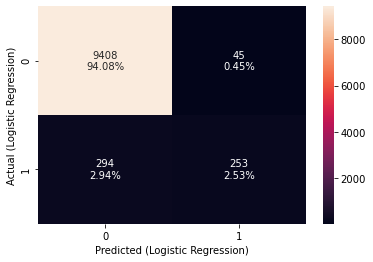

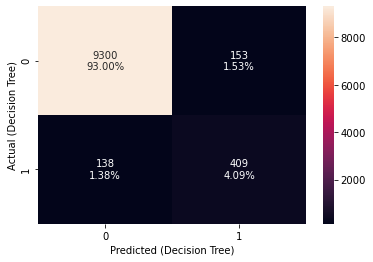

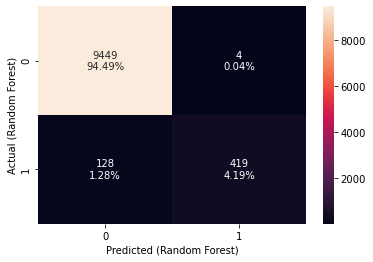

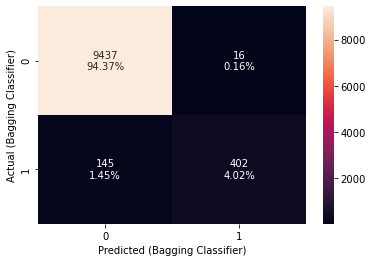

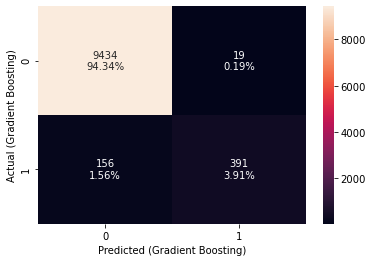

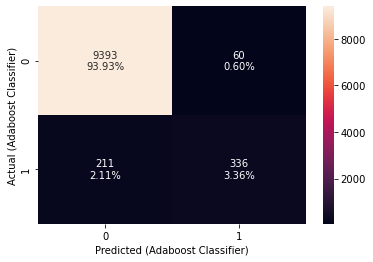

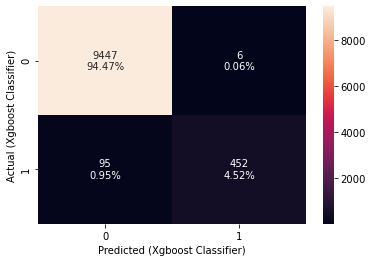

In [69]:
models_reg = []  # Empty list to store all the models

# Appending models into the list
models_reg.append(("Logistic Regression", LogisticRegression(random_state=1)))
models_reg.append(("Decision Tree", DecisionTreeClassifier(random_state=1)))
models_reg.append(("Random Forest", RandomForestClassifier(random_state=1)))
models_reg.append(("Bagging Classifier", BaggingClassifier(random_state=1)))
models_reg.append(("Gradient Boosting", GradientBoostingClassifier(random_state=1)))
models_reg.append(("Adaboost Classifier", AdaBoostClassifier(random_state=1)))
models_reg.append(("Xgboost Classifier", XGBClassifier(random_state=1, eval_metric="logloss")))

results_reg = []  # Empty list to store all model's CV scores
names_reg = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
print("Cross-Validation Cost (Training):")
for name, model in models_reg:
    kfold_reg = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result_reg = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold_reg
    )
    results_reg.append(cv_result_reg) # Get the CV Scores in results
    names_reg.append(name) # Get the model names in names
    print("* for {} is {}.".format(name, cv_result_reg.mean())) # Display the mean of cv results

all_model_train_reg_df = pd.DataFrame() # Empty dataframes for storing training perf metrics.
all_model_val_reg_df = pd.DataFrame() # Empty dataframes for storing validation perf metrics.

print("\n" "Recall Scores (Validation):")
for name, model in models_reg:
    model.fit(X_train, y_train)
    # Get the training perf metrics
    model_train_reg_df = model_performance_classification_sklearn(model,X_train, y_train)
    # adding the training perf metrics to the dataframe
    all_model_train_reg_df = pd.concat(
        [
            all_model_train_reg_df,
            model_train_reg_df.T
        ],axis=1
    )    
    scores_reg = recall_score(y_val, model.predict(X_val))
    # Display the recall score for validation model
    print("* for {} is {}".format(name, scores_reg))
    # Get the validation perf metrics
    model_val_reg_df = model_performance_classification_sklearn(model,X_val,y_val)
    # adding the validation perf metrics to the dataframe
    all_model_val_reg_df = pd.concat(
        [
            all_model_val_reg_df,
            model_val_reg_df.T
        ],axis=1
    )

# Adding column names to perf metrics dataframes
all_model_train_reg_df.columns = names_reg
all_model_val_reg_df.columns = names_reg

print("\n" "Training Performance Metrics:")
display(all_model_train_reg_df)
print("Validation Performance Metrics:")
display(all_model_val_reg_df)
    
print("Validation Confusion Matrices:".format())
for name, model in models_reg:
    # Display confusion matrix
    confusion_matrix_sklearn(model,X_val,y_val,name)

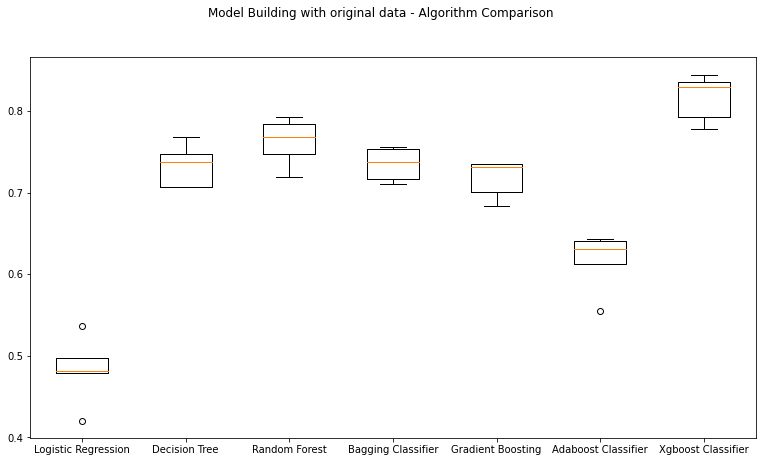

In [70]:
# Get the figure size and title of the model
fig = plt.figure(figsize=(13, 7))
fig.suptitle("Model Building with original data - Algorithm Comparison")
ax = fig.add_subplot(111)

# Plotting boxplots for CV scores of all models defined above
plt.boxplot(results_reg)
ax.set_xticklabels(names_reg)

plt.show()

#### Observations:
- We can see that XGboost is giving the highest cross-validated recall followed by Random Forest.
- The Performance of XGBoost is highest on cross-validation.

### <a name='link21'>**Model Building with Oversampled data**</a>

In [71]:
# Import Library to oversample data
from imblearn.over_sampling import SMOTE

# Synthetic Minority Over Sampling Technique
SMoOverSampled = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = SMoOverSampled.fit_resample(X_train, y_train)

In [72]:
print("Before UpSampling, counts of failures: {}".format(sum(y_train == 1)))
print("Before UpSampling, counts of No-failures: {} \n".format(sum(y_train == 0)))

print("After UpSampling, counts of failures: {}".format(sum(y_train_over == 1)))
print("After UpSampling, counts of No-failures: {}".format(sum(y_train_over == 0)))
print("-" * 60)
print("Before UpSampling, the shape of X_train: {}".format(X_train.shape))
print("Before UpSampling, the shape of y_train: {} \n".format(y_train.shape))

print("After UpSampling, the shape of X_train: {}".format(X_train_over.shape))
print("After UpSampling, the shape of y_train: {}".format(y_train_over.shape))

Before UpSampling, counts of failures: 1640
Before UpSampling, counts of No-failures: 28360 

After UpSampling, counts of failures: 28360
After UpSampling, counts of No-failures: 28360
------------------------------------------------------------
Before UpSampling, the shape of X_train: (30000, 40)
Before UpSampling, the shape of y_train: (30000,) 

After UpSampling, the shape of X_train: (56720, 40)
After UpSampling, the shape of y_train: (56720,)


Cross-Validation Cost (Training):
* for Logistic Regression is 0.48292682926829267.
* for Decision Tree is 0.7335365853658538.
* for Random Forest is 0.7621951219512195.
* for Bagging Classifier is 0.7347560975609755.
* for Gradient Boosting is 0.7170731707317073.
* for Adaboost Classifier is 0.6164634146341463.
* for Xgboost Classifier is 0.8158536585365853.

Recall Scores (Validation):
* for Logistic Regression is 0.8391224862888482
* for Decision Tree is 0.8135283363802559
* for Random Forest is 0.8683729433272395
* for Bagging Classifier is 0.8354661791590493
* for Gradient Boosting is 0.8811700182815356
* for Adaboost Classifier is 0.850091407678245
* for Xgboost Classifier is 0.8793418647166362

Training Performance Metrics:


,Logistic Regression,Decision Tree,Random Forest,Bagging Classifier,Gradient Boosting,Adaboost Classifier,Xgboost Classifier
Accuracy,0.874383,1.0,1.0,0.998925,0.943618,0.904654,0.999013
Recall,0.875564,1.0,1.0,0.998272,0.914492,0.893829,0.998625
Precision,0.873501,1.0,1.0,0.999576,0.971057,0.913609,0.999400
F1,0.874531,1.0,1.0,0.998924,0.941926,0.903611,0.999012


Validation Performance Metrics:


,Logistic Regression,Decision Tree,Random Forest,Bagging Classifier,Gradient Boosting,Adaboost Classifier,Xgboost Classifier
Accuracy,0.872800,0.951100,0.990900,0.983900,0.965900,0.905400,0.988700
Recall,0.839122,0.813528,0.868373,0.835466,0.881170,0.850091,0.879342
Precision,0.279367,0.534856,0.961538,0.865530,0.635884,0.349887,0.910985
F1,0.419178,0.645395,0.912584,0.850233,0.738697,0.495736,0.894884


Validation Confusion Matrices:


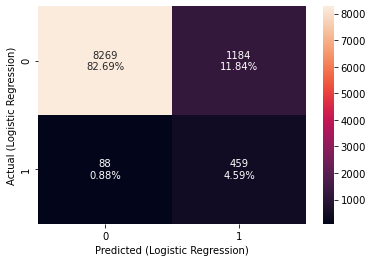

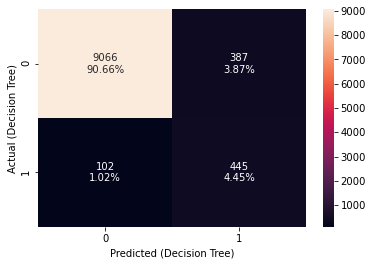

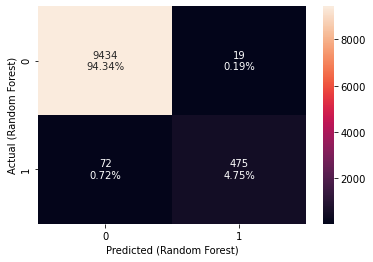

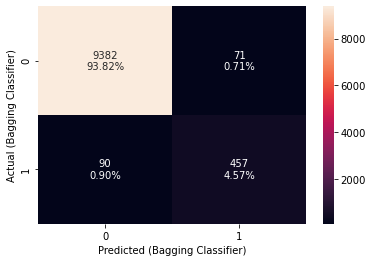

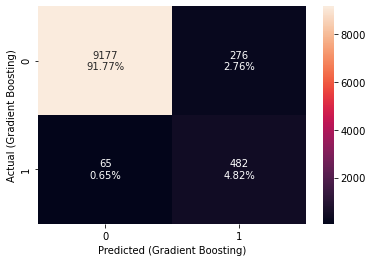

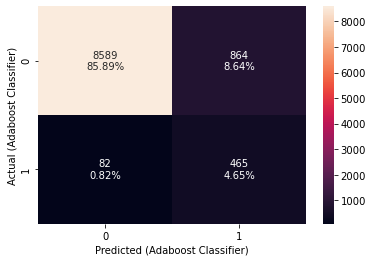

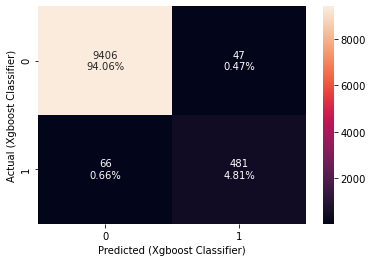

In [73]:
models_over = []  # Empty list to store all the models

# Appending models into the list
models_over.append(("Logistic Regression", LogisticRegression(random_state=1)))
models_over.append(("Decision Tree", DecisionTreeClassifier(random_state=1)))
models_over.append(("Random Forest", RandomForestClassifier(random_state=1)))
models_over.append(("Bagging Classifier", BaggingClassifier(random_state=1)))
models_over.append(("Gradient Boosting", GradientBoostingClassifier(random_state=1)))
models_over.append(("Adaboost Classifier", AdaBoostClassifier(random_state=1)))
models_over.append(("Xgboost Classifier", XGBClassifier(random_state=1, eval_metric="logloss")))

results_over = []  # Empty list to store all model's CV scores
names_over = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
print("Cross-Validation Cost (Training):")
for name, model in models_over:
    kfold_over = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result_over = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold_over
    )
    results_over.append(cv_result_over) # Get the CV Scores in results
    names_over.append(name)
    print("* for {} is {}.".format(name, cv_result_over.mean())) # Display the mean of cv results

all_model_train_over_df = pd.DataFrame() # Empty dataframes for storing training perf metrics.
all_model_val_over_df = pd.DataFrame() # Empty dataframes for storing validation perf metrics.

print("\n" "Recall Scores (Validation):")
for name, model in models_over:
    model.fit(X_train_over, y_train_over)
    # Get the training perf metrics
    model_train_over_df = model_performance_classification_sklearn(model,X_train_over, y_train_over)
    # adding the training perf metrics to the dataframe
    all_model_train_over_df = pd.concat(
        [
            all_model_train_over_df,
            model_train_over_df.T
        ],axis=1
    )
    # Display the recall score for validation model
    scores_over = recall_score(y_val, model.predict(X_val))
    print("* for {} is {}".format(name, scores_over))
    # Get the validation perf metrics
    model_val_over_df = model_performance_classification_sklearn(model,X_val,y_val)
    # adding the validation perf metrics to the dataframe
    all_model_val_over_df = pd.concat(
        [
            all_model_val_over_df,
            model_val_over_df.T
        ],axis=1
    )

# Adding column names to perf metrics dataframes
all_model_train_over_df.columns = names_over
all_model_val_over_df.columns = names_over

print("\n" "Training Performance Metrics:")
display(all_model_train_over_df)
print("Validation Performance Metrics:")
display(all_model_val_over_df)
    
print("Validation Confusion Matrices:".format())
for name, model in models_over:
    # Display confusion matrix
    confusion_matrix_sklearn(model,X_val,y_val,name)

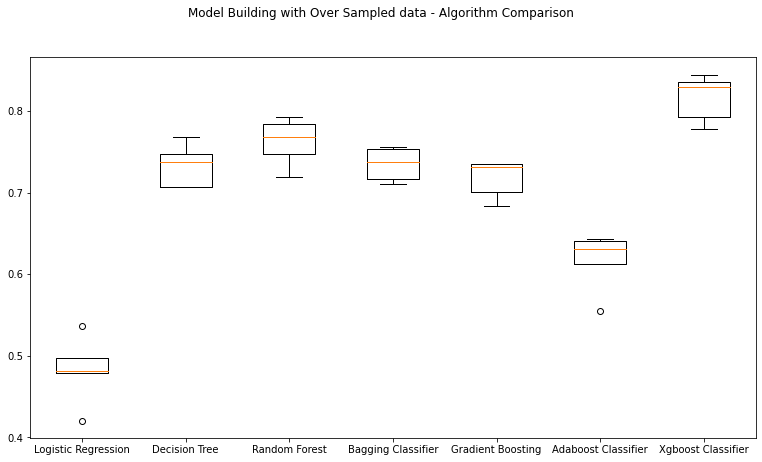

In [74]:
# Get the figure size and title of the model
fig = plt.figure(figsize=(13, 7))
fig.suptitle("Model Building with Over Sampled data - Algorithm Comparison")
ax = fig.add_subplot(111)

# Plotting boxplots for CV scores of all models defined above
plt.boxplot(results_over)
ax.set_xticklabels(names_over)

plt.show()

#### Observations:
- We can see that XGboost is giving the highest cross-validated recall followed by Random Forest, Decision Tree and Bagging Classifier.
- The Performance of XGBoost is highest on cross-validation.

### <a name='link22'>**Model Building with Undersampled data**</a>

In [75]:
# Import Library to undersample data
from imblearn.under_sampling import RandomUnderSampler

# Random undersampler for under sampling the data
RandomUndersampler = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = RandomUndersampler.fit_resample(X_train, y_train)

In [76]:
print("Before Under Sampling, counts of failures: {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of No-failures: {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of failures: {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of No-failures: {}".format(sum(y_train_un == 0)))
print("-" * 60)
print("Before Under Sampling, the shape of X_train: {}".format(X_train.shape))
print("Before Under Sampling, the shape of y_train: {} \n".format(y_train.shape))

print("After Under Sampling, the shape of X_train: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of y_train: {}".format(y_train_un.shape))

Before Under Sampling, counts of failures: 1640
Before Under Sampling, counts of No-failures: 28360 

After Under Sampling, counts of failures: 1640
After Under Sampling, counts of No-failures: 1640
------------------------------------------------------------
Before Under Sampling, the shape of X_train: (30000, 40)
Before Under Sampling, the shape of y_train: (30000,) 

After Under Sampling, the shape of X_train: (3280, 40)
After Under Sampling, the shape of y_train: (3280,)


Cross-Validation Cost (Training):
* for Logistic Regression is 0.48292682926829267.
* for Decision Tree is 0.7335365853658538.
* for Random Forest is 0.7621951219512195.
* for Bagging Classifier is 0.7347560975609755.
* for Gradient Boosting is 0.7170731707317073.
* for Adaboost Classifier is 0.6164634146341463.
* for Xgboost Classifier is 0.8158536585365853.

Recall Scores (Validation):
* for Logistic Regression is 0.8464351005484461
* for Decision Tree is 0.8537477148080439
* for Random Forest is 0.8848263254113345
* for Bagging Classifier is 0.8628884826325411
* for Gradient Boosting is 0.8884826325411335
* for Adaboost Classifier is 0.8647166361974405
* for Xgboost Classifier is 0.9012797074954296

Training Performance Metrics:


,Logistic Regression,Decision Tree,Random Forest,Bagging Classifier,Gradient Boosting,Adaboost Classifier,Xgboost Classifier
Accuracy,0.859451,1.0,1.0,0.989024,0.952134,0.906098,1.0
Recall,0.855488,1.0,1.0,0.979878,0.918293,0.893902,1.0
Precision,0.862323,1.0,1.0,0.998137,0.984957,0.916250,1.0
F1,0.858892,1.0,1.0,0.988923,0.950458,0.904938,1.0


Validation Performance Metrics:


,Logistic Regression,Decision Tree,Random Forest,Bagging Classifier,Gradient Boosting,Adaboost Classifier,Xgboost Classifier
Accuracy,0.864100,0.866300,0.966400,0.950500,0.951300,0.879700,0.968800
Recall,0.846435,0.853748,0.884826,0.862888,0.888483,0.864717,0.901280
Precision,0.266398,0.270882,0.639366,0.529148,0.532895,0.295256,0.656458
F1,0.405252,0.411273,0.742331,0.656011,0.666210,0.440205,0.759630


Validation Confusion Matrices:


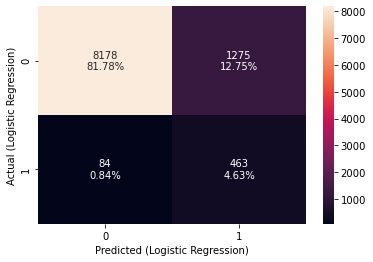

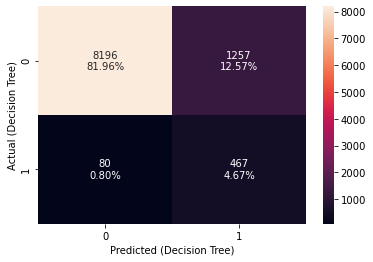

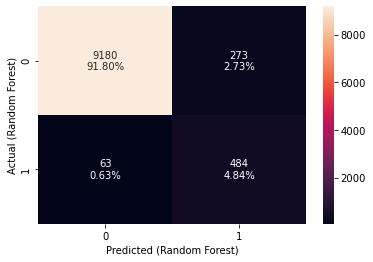

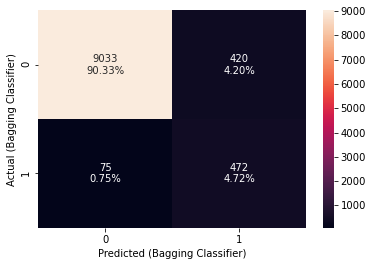

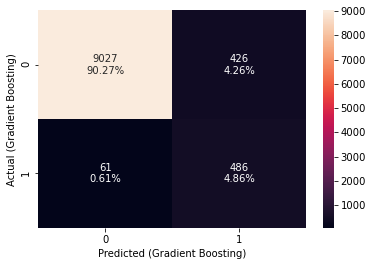

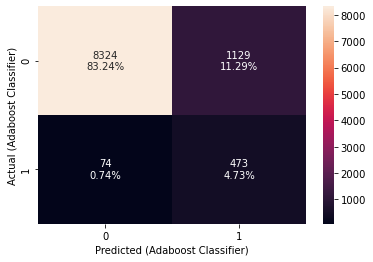

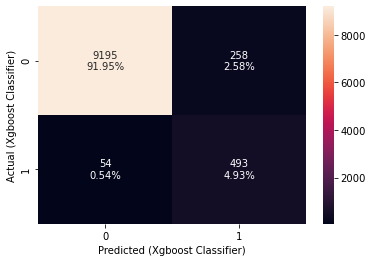

In [77]:
models_un = []  # Empty list to store all the models

# Appending models into the list
models_un.append(("Logistic Regression", LogisticRegression(random_state=1)))
models_un.append(("Decision Tree", DecisionTreeClassifier(random_state=1)))
models_un.append(("Random Forest", RandomForestClassifier(random_state=1)))
models_un.append(("Bagging Classifier", BaggingClassifier(random_state=1)))
models_un.append(("Gradient Boosting", GradientBoostingClassifier(random_state=1)))
models_un.append(("Adaboost Classifier", AdaBoostClassifier(random_state=1)))
models_un.append(("Xgboost Classifier", XGBClassifier(random_state=1, eval_metric="logloss")))

results_un = []  # Empty list to store all model's CV scores
names_un = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
print("Cross-Validation Cost (Training):")
for name, model in models_un:
    kfold_un = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result_un = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold_un
    )
    results_un.append(cv_result_un) # Get the CV Scores in results
    names_un.append(name)
    print("* for {} is {}.".format(name, cv_result_un.mean())) # Display the mean of cv results

all_model_train_un_df = pd.DataFrame() # Empty dataframes for storing training perf metrics.
all_model_val_un_df = pd.DataFrame() # Empty dataframes for storing validation perf metrics.

print("\n" "Recall Scores (Validation):")
for name, model in models_un:
    model.fit(X_train_un, y_train_un)
    # Get the training perf metrics
    model_train_un_df = model_performance_classification_sklearn(model,X_train_un, y_train_un)
    # adding the training perf metrics to the dataframe
    all_model_train_un_df = pd.concat(
        [
            all_model_train_un_df,
            model_train_un_df.T
        ],axis=1
    )    
    # Display the recall score for validation model
    scores_un = recall_score(y_val, model.predict(X_val))
    print("* for {} is {}".format(name, scores_un))
    # Get the validation perf metrics
    model_val_un_df = model_performance_classification_sklearn(model,X_val,y_val)
    # adding the validation perf metrics to the dataframe
    all_model_val_un_df = pd.concat(
        [
            all_model_val_un_df,
            model_val_un_df.T
        ],axis=1
    )

# Adding column names to perf metrics dataframes
all_model_train_un_df.columns = names_un
all_model_val_un_df.columns = names_un

print("\n" "Training Performance Metrics:")
display(all_model_train_un_df)
print("Validation Performance Metrics:")
display(all_model_val_un_df)
    
print("Validation Confusion Matrices:".format())
for name, model in models_un:
    # Display confusion matrix
    confusion_matrix_sklearn(model,X_val,y_val,name)

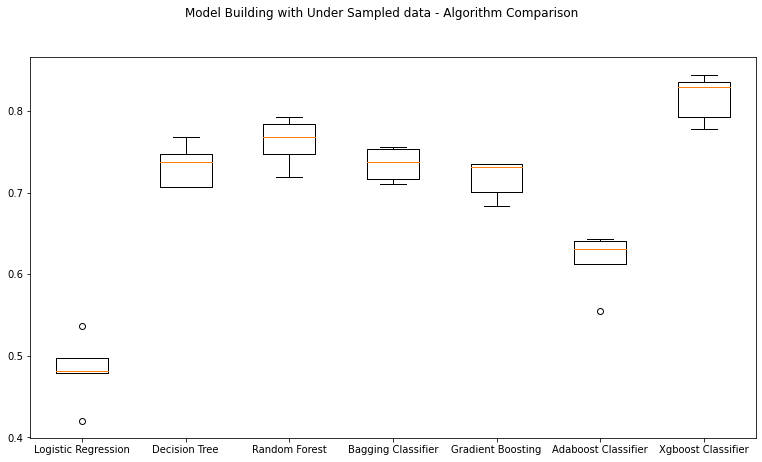

In [78]:
# Get the figure size and title of the model
fig = plt.figure(figsize=(13, 7))
fig.suptitle("Model Building with Under Sampled data - Algorithm Comparison")
ax = fig.add_subplot(111)

# Plotting boxplots for CV scores of all models defined above
plt.boxplot(results_un)
ax.set_xticklabels(names_un)

plt.show()

#### Observations:
- We can see that XGboost is giving the highest cross-validated recall followed by Random Forest, Decision Tree and Bagging Classifier.
- The Performance of XGBoost is highest on cross-validation.

### Selecting the best 3 models
- Here is my criteria: I am looking for models with 0.82 recall without compromising the precision, expecting the precision to be atleast 0.70. The reason behind this is that such models have a good chance of generalizing in the production world.


- With the above criteria, none of the models with undersampled data qualify as best models. The best one among Undersampled models is Xgboost Classifier with recall of 0.9, but precision is less than 0.7.
- For models with original data, again XGBoost Classifier is a clear winner with recall of 0.82 and precision of 0.98. This model can be considered.
- For models with Oversampled data, we have three models that qualify:
    - XGBoost Classifier with recall of 0.88 and precision of 0.91
    - Random Forest with recall of 0.86 and precision of 0.96
    - Bagging Classifier with recall of 0.83 and precision of 0.86
- I have decied to go with models with Oversampled data, beliving that the class weights need to be balanced in achieveing better models.

## <a name='link3'>**HyperparameterTuning**</a>

**We will tune Xgboost, Random Forest and Bagging Classifier oversampled models using GridSearchCV and RandomizedSearchCV. We will also compare the performance and time taken by these two methods - grid search and randomized search.**

In [79]:
# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

### <a name='link30'>**XGBoost with oversampled data (with hyperparameter tuning)**</a>
#### GridSearchCV

In [80]:
#defining model
model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in GridSearchCV
param_grid={
    'n_estimators': [150, 200, 250],
    'scale_pos_weight': [5,10],
    'learning_rate': [0.1,0.2],
    'gamma': [0,3,5],
    'subsample': [0.8,0.9]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
XGB_grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1, verbose= 5)

#Fitting parameters in GridSearchCV
XGB_grid_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(XGB_grid_cv.best_params_,XGB_grid_cv.best_score_))

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 33.7min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 79.3min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 145.0min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed: 189.3min finished


Best parameters are {'gamma': 0, 'learning_rate': 0.1, 'n_estimators': 200, 'scale_pos_weight': 10, 'subsample': 0.9} with CV score=0.9959802538787024:


In [81]:
# building model with best parameters
XGB_grid_tuned = XGBClassifier(
    random_state=1,
    eval_metric='logloss',
    gamma=0,
    learning_rate=0.1,
    n_estimators=200,
    scale_pos_weight=10,
    subsample=0.9
)

# Fit the model on training data
XGB_grid_tuned.fit(X_train_over,y_train_over)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=10, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [82]:
#Calculating different metrics for training data
XGB_grid_tuned_train_perf = model_performance_classification_sklearn(XGB_grid_tuned,X_train_over,y_train_over)
print("Training performance:")
XGB_grid_tuned_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.989104,1.0,0.978673,0.989222


In [83]:
#Calculating different metrics for validation data
XGB_grid_tuned_val_perf = model_performance_classification_sklearn(XGB_grid_tuned,X_val,y_val)
print("Validation performance:")
XGB_grid_tuned_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.9651,0.906764,0.624685,0.739746


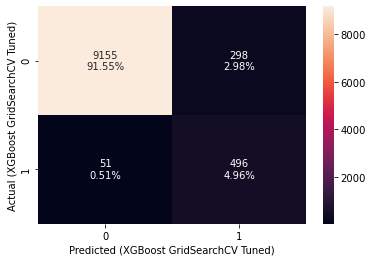

In [84]:
#Creating confusion matrix
confusion_matrix_sklearn(XGB_grid_tuned,X_val,y_val,'XGBoost GridSearchCV Tuned')

#### Observations:
* The XGBoost GridSearchCV Hyperparameter tuned model is not overfitting as performance metrics between training and validation regions are similar.
* Out of the 547 failed generators in validation dataset, the model was able to predict 496 of them.

#### RandomizedSearchCV

In [85]:
#defining model
model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomizedSearchCV
param_grid={
    'n_estimators': np.arange(150,300,50),
    'scale_pos_weight': [5,10],
    'learning_rate': [0.1,0.2],
    'gamma': [0,3,5],
    'subsample': [0.8,0.9]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
XGB_randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1, verbose= 5)

#Fitting parameters in RandomizedSearchCV
XGB_randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(XGB_randomized_cv.best_params_,XGB_randomized_cv.best_score_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 28.4min finished


Best parameters are {'subsample': 0.9, 'scale_pos_weight': 10, 'n_estimators': 250, 'learning_rate': 0.1, 'gamma': 5} with CV score=0.9959802538787024:


In [86]:
# building model with best parameters
XGB_randomized_tuned = XGBClassifier(
    random_state=1,
    eval_metric='logloss',
    subsample=0.9,
    scale_pos_weight=10,
    n_estimators=250,
    learning_rate=0.1,
    gamma=5
)

# Fit the model on training data
XGB_randomized_tuned.fit(X_train_over,y_train_over)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=5, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=250, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=10, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [87]:
#Calculating different metrics for training data
XGB_randomized_tuned_train_perf = model_performance_classification_sklearn(XGB_randomized_tuned,X_train_over,y_train_over)
print("Training performance:")
XGB_randomized_tuned_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.994094,1.0,0.988325,0.994128


In [88]:
#Calculating different metrics for validation data
XGB_randomized_tuned_val_perf = model_performance_classification_sklearn(XGB_randomized_tuned,X_val,y_val)
print("Validation performance:")
XGB_randomized_tuned_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.9738,0.904936,0.702128,0.790735


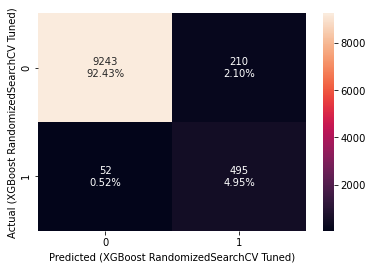

In [89]:
#Creating confusion matrix
confusion_matrix_sklearn(XGB_randomized_tuned,X_val,y_val,'XGBoost RandomizedSearchCV Tuned')

#### Observations:
* The XGBoost RandomizedSearchCV Hyperparameter tuned model is not overfitting as performance metrics between training and validation regions are similar.
* Out of the 547 failed generators in validation dataset, the model was able to predict 495 of them.

### <a name='link31'>**Random Forest Classifier with oversampled data (with hyperparameter tuning)**</a>
#### GridSearchCV

In [90]:
#defining model
model = RandomForestClassifier(random_state=1)

#Parameter grid to pass in GridSearchCV
param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
RF_grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1, verbose= 5)

#Fitting parameters in GridSearchCV
RF_grid_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(RF_grid_cv.best_params_,RF_grid_cv.best_score_))

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed: 30.5min finished


Best parameters are {'max_features': 'sqrt', 'max_samples': 0.6, 'min_samples_leaf': 1, 'n_estimators': 250} with CV score=0.9780324400564175:


In [91]:
# building model with best parameters
RF_grid_tuned = RandomForestClassifier(
    random_state=1,
    max_features='sqrt',
    max_samples=0.6,
    min_samples_leaf=1,
    n_estimators=250
)

# Fit the model on training data
RF_grid_tuned.fit(X_train_over,y_train_over)

RandomForestClassifier(max_features='sqrt', max_samples=0.6, n_estimators=250,
                       random_state=1)

In [92]:
#Calculating different metrics for training data
RF_grid_tuned_train_perf = model_performance_classification_sklearn(RF_grid_tuned,X_train_over,y_train_over)
print("Training performance:")
RF_grid_tuned_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.99963,0.999401,0.999859,0.99963


In [93]:
#Calculating different metrics for validation data
RF_grid_tuned_val_perf = model_performance_classification_sklearn(RF_grid_tuned,X_val,y_val)
print("Validation performance:")
RF_grid_tuned_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.9904,0.872029,0.94831,0.908571


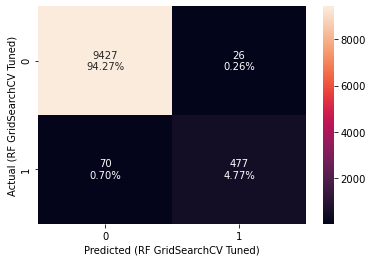

In [94]:
#Creating confusion matrix
confusion_matrix_sklearn(RF_grid_tuned,X_val,y_val,'RF GridSearchCV Tuned')

#### Observations:
* The Random Forest GridSearchCV Hyperparameter tuned model is not overfitting as performance metrics between training and validation regions are similar.
* Out of the 547 failed generators in validation dataset, the model was able to predict 477 of them.

#### RandomizedSearchCV

In [95]:
#defining model
model = RandomForestClassifier(random_state=1)

#Parameter grid to pass in RandomizedSearchCV
param_grid = {
    "n_estimators": np.arange(200,350,50),
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
RF_randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1, verbose= 5)

#Fitting parameters in RandomizedSearchCV
RF_randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(RF_randomized_cv.best_params_,RF_randomized_cv.best_score_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  9.4min finished


Best parameters are {'n_estimators': 250, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.9780324400564175:


In [96]:
# building model with best parameters
RF_randomized_tuned = RandomForestClassifier(
    random_state=1,
    n_estimators=250,
    min_samples_leaf=1,
    max_samples=0.6,
    max_features='sqrt'
)

# Fit the model on training data
RF_randomized_tuned.fit(X_train_over,y_train_over)

RandomForestClassifier(max_features='sqrt', max_samples=0.6, n_estimators=250,
                       random_state=1)

In [97]:
#Calculating different metrics for training data
RF_randomized_tuned_train_perf = model_performance_classification_sklearn(RF_randomized_tuned,X_train_over,y_train_over)
print("Training performance:")
RF_randomized_tuned_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.99963,0.999401,0.999859,0.99963


In [98]:
#Calculating different metrics for validation data
RF_randomized_tuned_val_perf = model_performance_classification_sklearn(RF_randomized_tuned,X_val,y_val)
print("Validation performance:")
RF_randomized_tuned_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.9904,0.872029,0.94831,0.908571


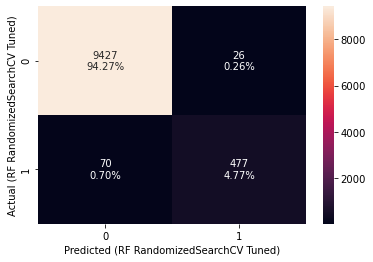

In [99]:
#Creating confusion matrix
confusion_matrix_sklearn(RF_randomized_tuned,X_val,y_val,'RF RandomizedSearchCV Tuned')

#### Observations:
* The Random Forest RandomizedSearchCV Hyperparameter tuned model is not overfitting as performance metrics between training and validation regions are similar.
* Out of the 547 failed generators in validation dataset, the model was able to predict 477 of them.

### <a name='link32'>**Bagging Classifier with oversampled data (with hyperparameter tuning)**</a>
#### GridSearchCV

In [100]:
#defining model
model = BaggingClassifier(random_state=1)

#Parameter grid to pass in GridSearchCV
param_grid = {
    'max_samples': [0.8,0.9,1], 
    'max_features': [0.7,0.8,0.9],
    'n_estimators': [30,50,70],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
Bagging_grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1, verbose= 5)

#Fitting parameters in GridSearchCV
Bagging_grid_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(Bagging_grid_cv.best_params_,Bagging_grid_cv.best_score_))

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 18.4min
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed: 40.4min finished


Best parameters are {'max_features': 0.7, 'max_samples': 1, 'n_estimators': 50} with CV score=1.0:


In [101]:
# building model with best parameters
Bagging_grid_tuned = BaggingClassifier(
    random_state=1,
    max_features=0.7,
    max_samples=1,
    n_estimators=50
)

# Fit the model on training data
Bagging_grid_tuned.fit(X_train_over,y_train_over)

BaggingClassifier(max_features=0.7, max_samples=1, n_estimators=50,
                  random_state=1)

In [102]:
#Calculating different metrics for training data
Bagging_grid_tuned_train_perf = model_performance_classification_sklearn(Bagging_grid_tuned,X_train_over,y_train_over)
print("Training performance:")
Bagging_grid_tuned_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.5,1.0,0.5,0.666667


In [103]:
#Calculating different metrics for validation data
Bagging_grid_tuned_val_perf = model_performance_classification_sklearn(Bagging_grid_tuned,X_val,y_val)
print("Validation performance:")
Bagging_grid_tuned_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.0547,1.0,0.0547,0.103726


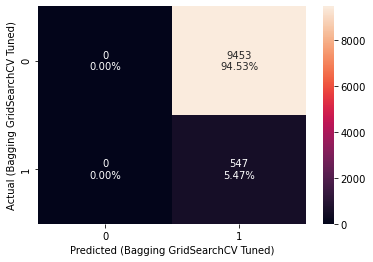

In [104]:
#Creating confusion matrix
confusion_matrix_sklearn(Bagging_grid_tuned,X_val,y_val,'Bagging GridSearchCV Tuned')

#### Observations:
* The Bagging Classifer GridSearchCV Hyperparameter tuned model is overfitting as performance metrics between training and testing regions are very different.
* Out of the 547 failed generators in validation dataset, the model was able to predict all of them. 
* This model is always predicting the case as **failed** and as expected, accuracy/precision metric of this model is not acceptable.

#### RandomizedSearchCV

In [105]:
#defining model
model = BaggingClassifier(random_state=1)

#Parameter grid to pass in RandomizedSearchCV
param_grid = {
    'max_samples': [0.8,0.9,1], 
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : np.arange(30,90,20),
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
Bagging_randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1, verbose= 5)

#Fitting parameters in RandomizedSearchCV
Bagging_randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(Bagging_randomized_cv.best_params_,Bagging_randomized_cv.best_score_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 21.8min finished


Best parameters are {'n_estimators': 70, 'max_samples': 1, 'max_features': 0.8} with CV score=1.0:


In [106]:
# building model with best parameters
Bagging_randomized_tuned = BaggingClassifier(
    random_state=1,
    n_estimators=70,
    max_samples=1,
    max_features=0.8
)

# Fit the model on training data
Bagging_randomized_tuned.fit(X_train_over,y_train_over)

BaggingClassifier(max_features=0.8, max_samples=1, n_estimators=70,
                  random_state=1)

In [107]:
#Calculating different metrics for training data
Bagging_randomized_tuned_train_perf = model_performance_classification_sklearn(Bagging_randomized_tuned,X_train_over,y_train_over)
print("Training performance:")
Bagging_randomized_tuned_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.5,1.0,0.5,0.666667


In [108]:
#Calculating different metrics for validation data
Bagging_randomized_tuned_val_perf = model_performance_classification_sklearn(Bagging_randomized_tuned,X_val,y_val)
print("Validation performance:")
Bagging_randomized_tuned_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.0547,1.0,0.0547,0.103726


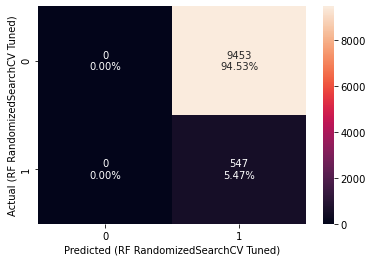

In [109]:
#Creating confusion matrix
confusion_matrix_sklearn(Bagging_randomized_tuned,X_val,y_val,'RF RandomizedSearchCV Tuned')

#### Observations:
* The Bagging Classifer RandomizedSearchCV Hyperparameter tuned model is overfitting as performance metrics between training and testing regions are very different.
* Out of the 547 failed generators in validation dataset, the model was able to predict all of them. 
* This model is always predicting the case as **failed** and as expected, accuracy/precision metric of this model is not acceptable.

## <a name='link4'>**Model performance comparison and choosing the final model**</a>

### Model Performance Summary - Training set

In [110]:
# training performance comparison
ReneWind_models_train_comp_df = pd.concat(
    [
        XGB_grid_tuned_train_perf.T,
        XGB_randomized_tuned_train_perf.T,
        RF_grid_tuned_train_perf.T,
        RF_randomized_tuned_train_perf.T,
        Bagging_grid_tuned_train_perf.T,
        Bagging_randomized_tuned_train_perf.T,
    ],
    axis=1,
)
ReneWind_models_train_comp_df.columns = [
    "XGBoost Tuned with Grid search",
    "XGBoost Tuned with Random search",
    "Random Forest Tuned with Grid search",
    "Random Forest Tuned with Random Search",
    "Bagging Classifier Tuned with Grid search",
    "Bagging Classifier Tuned with Random Search",
]
print("Training performance comparison:")
ReneWind_models_train_comp_df

Training performance comparison:


,XGBoost Tuned with Grid search,XGBoost Tuned with Random search,Random Forest Tuned with Grid search,Random Forest Tuned with Random Search,Bagging Classifier Tuned with Grid search,Bagging Classifier Tuned with Random Search
Accuracy,0.989104,0.994094,0.999630,0.999630,0.500000,0.500000
Recall,1.000000,1.000000,0.999401,0.999401,1.000000,1.000000
Precision,0.978673,0.988325,0.999859,0.999859,0.500000,0.500000
F1,0.989222,0.994128,0.999630,0.999630,0.666667,0.666667


### Model Performance Summary - Validation set

In [111]:
# Validation performance comparison
ReneWind_models_val_comp_df = pd.concat(
    [
        XGB_grid_tuned_val_perf.T,
        XGB_randomized_tuned_val_perf.T,
        RF_grid_tuned_val_perf.T,
        RF_randomized_tuned_val_perf.T,
        Bagging_grid_tuned_val_perf.T,
        Bagging_randomized_tuned_val_perf.T,
    ],
    axis=1,
)
ReneWind_models_val_comp_df.columns = [
    "XGBoost Tuned with Grid search",
    "XGBoost Tuned with Random search",
    "Random Forest Tuned with Grid search",
    "Random Forest Tuned with Random Search",
    "Bagging Classifier Tuned with Grid search",
    "Bagging Classifier Tuned with Random Search",
]
print("Validation performance comparison:")
ReneWind_models_val_comp_df

Validation performance comparison:


,XGBoost Tuned with Grid search,XGBoost Tuned with Random search,Random Forest Tuned with Grid search,Random Forest Tuned with Random Search,Bagging Classifier Tuned with Grid search,Bagging Classifier Tuned with Random Search
Accuracy,0.965100,0.973800,0.990400,0.990400,0.054700,0.054700
Recall,0.906764,0.904936,0.872029,0.872029,1.000000,1.000000
Precision,0.624685,0.702128,0.948310,0.948310,0.054700,0.054700
F1,0.739746,0.790735,0.908571,0.908571,0.103726,0.103726


### Conclusion
* Here we are looking for models with greater recall, as it means that the model will find every generator that has a minor chance of failure. So lets find the 4 models with high recalls:
    * XGBoost Tuned with Grid search - 90.6 %
    * XGBoost Tuned with Random search - 90.4 %
    * Random Forest Tuned with Grid and Random search - 87.2 %
    * Bagging Classifier Tuned with Grid and Random search - 100 %
* For the Bagging Classifier Tuned model, it achieved 100% recall by classifing each observation as 'failure'. This model cannot work in the real world due to it's poor accuracy and precision.
* For the Random forest Tuned model, it is a good model with 87.2% recall and good accuracy.
* For the XG Boost classifer Tuned with Random search model, it is also a good model with 90.5% recall and good accuracy and precision. It is better than the Random forest Tuned model.
* For the XG Boost classifer Tuned with Grid search model, it is also a good model with 90.7% recall. But this is an expensive model - it took 184.5 mins. Also the accuracy, precision and F1 score for this model is less than XG Boost classifer Tuned with Random search model. Also the XG Boost classifer Tuned with Random search model takes only 27 mins to build.

Hence I am going forward with **XG Boost classifer Tuned with RandomizedSearchCV model** as the **best model**.

### Test set final performance

In [112]:
#Calculating different metrics for test data
XGB_randomized_tuned_test_perf = model_performance_classification_sklearn(XGB_randomized_tuned,X_test,y_test)
print("Testing performance:")
XGB_randomized_tuned_test_perf

Testing performance:


,Accuracy,Recall,Precision,F1
0,0.9712,0.884826,0.682652,0.770701


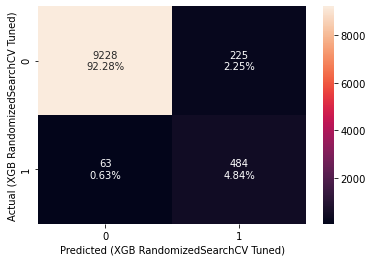

In [113]:
#Creating confusion matrix
confusion_matrix_sklearn(XGB_randomized_tuned,X_test,y_test,'XGB RandomizedSearchCV Tuned')

#### Observations:
* The XGBoost RandomizedSearchCV Hyperparameter tuned model is not overfitting as performance metrics between validation and testing regions are similar.
* Out of the 547 failed generators in testing dataset, the model was able to predict 484 of them.

In [114]:
# importance of features in the model sorted in descending order.
pd.DataFrame(
    XGB_randomized_tuned.feature_importances_,
    columns = ['Importance'],
    index = X.columns
).sort_values(
    by = 'Importance',
    ascending=False
)

,Importance
V36,0.120138
V26,0.061329
V18,0.053233
V39,0.050712
V16,0.050453
V14,0.044564
V21,0.034171
V1,0.033721
V34,0.032395
V11,0.030706


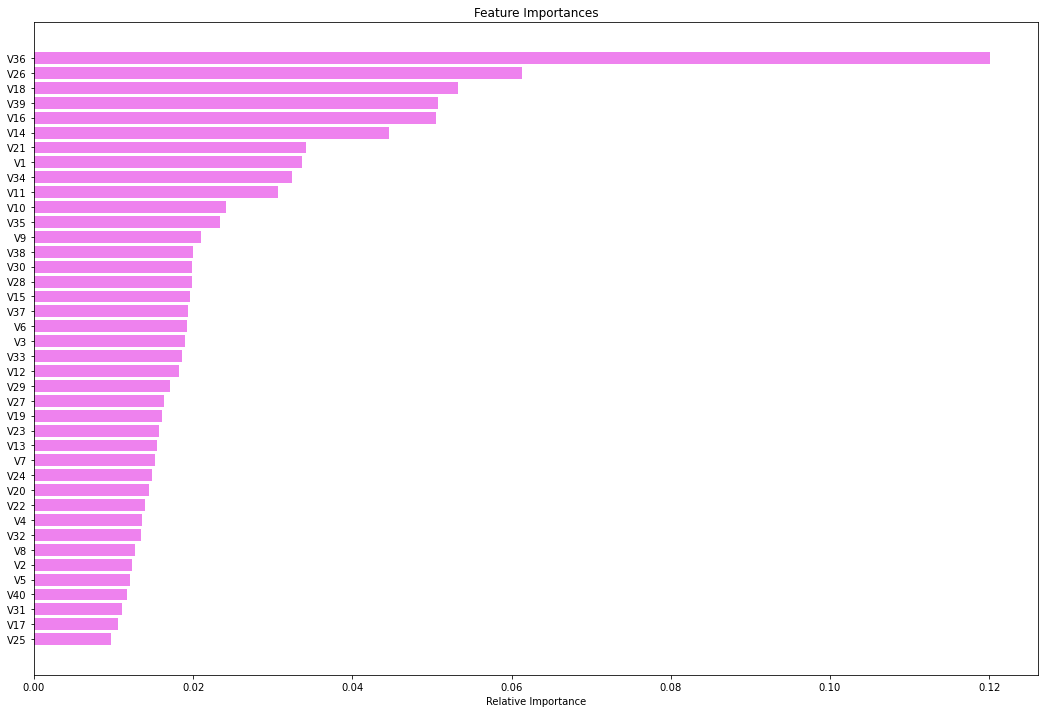

In [115]:
feature_names = X.columns
importances = XGB_randomized_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(18, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Observations:
* The three important features that impacts the failure of generator are *V36*, *V26* and *V18*.

## <a name='link5'>**Pipelines to build the final model**</a>
- Now, we have a final model. let's use pipelines to put the model into production

In [116]:
# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [117]:
# Get a copy of X_train_copy and y_train_copy for using in pipelines.
X_train2 = X_train_copy.copy()
y_train2 = y_train_copy.copy()

* We are using the parameters of the best model - XGBoost with Randomized Search CV as the parameters of the pipline's estimator.

In [118]:
# Creating new pipeline with best parameters
model_pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        (
            "XGB",
            XGBClassifier(
                random_state=1,
                eval_metric='logloss',
                subsample=0.9,
                scale_pos_weight=10,
                n_estimators=250,
                learning_rate=0.1,
                gamma=5
            ),
        ),
    ]
)

# Fit the model on training data
model_pipeline.fit(X_train2, y_train2)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('XGB',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               eval_metric='logloss', gamma=5, gpu_id=-1,
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.1, max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=250,
                               n_jobs=4, num_parallel_tree=1, predictor='auto',
                               random_state=1, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=10, subsample=0.9,
                               tree_method='exact', validate_parameters=1,
                           

In [119]:
# Predict the model on validation data
model_pipeline.predict(X_val)

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [120]:
#Calculating different metrics for validation data
Model_Pipeline_val_perf = model_performance_classification_sklearn(model_pipeline,X_val,y_val)
print("Validation performance:")
Model_Pipeline_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.9913,0.872029,0.965587,0.916427


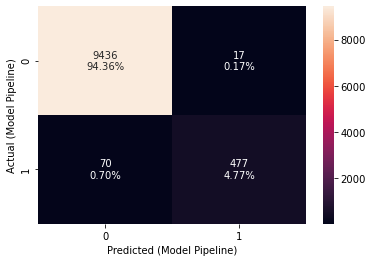

In [121]:
#Creating confusion matrix
confusion_matrix_sklearn(model_pipeline,X_val,y_val,'Model Pipeline')

In [122]:
# Predict the model on test data
model_pipeline.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [123]:
#Calculating different metrics for test data
Model_Pipeline_test_perf = model_performance_classification_sklearn(model_pipeline,X_test,y_test)
print("Testing performance:")
Model_Pipeline_test_perf

Testing performance:


,Accuracy,Recall,Precision,F1
0,0.9891,0.850091,0.945122,0.895091


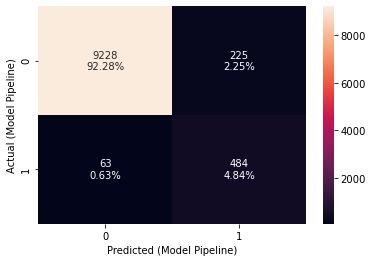

In [124]:
#Creating confusion matrix
confusion_matrix_sklearn(XGB_randomized_tuned,X_test,y_test,'Model Pipeline')

#### Observations:
* The Pipeline model is not overfitting as performance metrics between validation and testing regions are similar.
* Out of the 547 failed generators in testing dataset, the model was able to predict 484 of them.

## <a name='link6'>**Business Insights and Conclusions**</a>

### Insights
* Among the data collected from sensors, V36 is a major factor that influences the generator failure. When the value of V36 less than zero, the generator needs to be repaired to save the replacement cost.
* The value of V26 is the second major factor that impacts the generator failure. The value of V26 less than zero is concerning as it is leading to a generator failure is most cases.
* The value of V18 also plays a role in indicating the generator failure. As value of V18 becomes negative and under zero, it is time to inspect the generator.
* The value of V39 also plays a role in indicating the generator failure, even though its influence is lower than V36 and V26. A negative value of V39 is an indicator that the generator is in trouble.
* The value of V16 and V14 also plays their part in indicating the generator failure. Unlike the above influencers, a positive value of V16 and V14 says that it is time to inspect the generator and repair it if needed.

### Conclusion
* The ReneWind company is on the right track on improving the machinery using machine learning and collecting data of generator failure of wind turbines using sensors. The reading provided by sensors are providing an insight into generator failure.
* The repair cost of a generator is only USD 15K compared to the replacement cost of USD 40K, hence an early detection of generator failure for 100 machines will save the company USD 2.5M in the long run. 
* Since every generator will failure indicator needs to be inspected, if ReneWind company can bring down the inspection cost from USD 5K, that would contribute to additional savings for the company.
* Since the data is collected by sensors, ReneWind should invest in maintaining the sensors. An annual inspection of sensors should be mandated to ensure that the sensors are working without errors.
* ReneWind should also consider Robotic Process automation for handling generator inspections and repairs (for common defects). This can eventually bring down the inspection and repair cost to some extend.